<h1 style="font-size:30px;"><center><ins>Earthquake Damage Prediction</ins></center></h1>

## Business Case

To create a predictive model to predict the level of damage grade affected by the earthquake.



<img src="https://cdn.zeebiz.com/sites/default/files/styles/zeebiz_850x478/public/2020/10/24/131828-earthquaake-ians.PNG?itok=jQbbOVGH">

## Domain Analysis

* Features
    - The dataset mainly consists of information on the buildings' structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake.
    - There are 39 columns in this dataset, where the building_id column is a unique and random identifier. The remaining 38 features are described in the section below. Categorical variables have been obfuscated random lowercase ascii characters. The appearance of the same character in distinct columns does not imply the same original value.
* Description
    - geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int): geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
    - count_floors_pre_eq (type: int): number of floors in the building before the earthquake.
    - age (type: int): age of the building in years.
    - area_percentage (type: int): normalized area of the building footprint.
    - height_percentage (type: int): normalized height of the building footprint.
    - land_surface_condition (type: categorical): surface condition of the land where the building was built. Possible values: n, o, t.
        - n: Indicates "normal" surface condition.
        - o: Indicates "other" surface condition.
        - t: Indicates "technical" surface condition.
    - foundation_type (type: categorical): type of foundation used while building. Possible values: h, i, r, u, w.
        - h: Indicates the use of "hard foundation."
        - i: Indicates the use of "other foundation."
        - r: Indicates the use of "reinforced foundation."
        - u: Indicates the use of "bamboo foundation."
        - w: Indicates the use of "wooden foundation."

    - roof_type (type: categorical): type of roof used while building. Possible values: n, q, x.
        - n: Indicates the use of a "normal" roof type.
        - q: Indicates the use of a "hip" roof type.
        - x: Indicates the use of an "unknown" roof type.
    - ground_floor_type (type: categorical): type of the ground floor. Possible values: f, m, v, x, z.
        - f: Indicates a ground floor made of "fine aggregate concrete."
        - m: Indicates a ground floor made of "mud."
        - v: Indicates a ground floor made of "not applicable" material.
        - x: Indicates a ground floor made of "timber."
        - z: Indicates a ground floor made of "zinc."
    - other_floor_type (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.
    - position (type: categorical): position of the building. Possible values: j, o, s, t.
        - j: Indicates the building is in a "j" (juvenile) position.
        - o: Indicates the building is in an "o" (other) position.
        - s: Indicates the building is in an "s" (secondary) position.
        - t: Indicates the building is in a "t" (tertiary) position.
    - plan_configuration (type: categorical): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.
    - has_superstructure_adobe_mud (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.
    - has_superstructure_mud_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
    - has_superstructure_stone_flag (type: binary): flag variable that indicates if the superstructure was made of Stone.
    - has_superstructure_cement_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.
    - has_superstructure_mud_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
    - has_superstructure_cement_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
    - has_superstructure_timber (type: binary): flag variable that indicates if the superstructure was made of Timber.
    - has_superstructure_bamboo (type: binary): flag variable that indicates if the superstructure was made of Bamboo.
    - has_superstructure_rc_non_engineered (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.
    - has_superstructure_rc_engineered (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.
    - has_superstructure_other (type: binary): flag variable that indicates if the superstructure was made of any other material.
    - legal_ownership_status (type: categorical): legal ownership status of the land where building was built. Possible values: a, r, v, w.
        - a: Indicates "other" legal ownership status.
        - r: Indicates "rented" legal ownership status.
        - v: Indicates "private" legal ownership status.
        - w: Indicates "public" legal ownership status. 
        
    - count_families (type: int): number of families that live in the building.
    - has_secondary_use (type: binary): flag variable that indicates if the building was used for any secondary purpose.
    - has_secondary_use_agriculture (type: binary): flag variable that indicates if the building was used for agricultural purposes.
    - has_secondary_use_hotel (type: binary): flag variable that indicates if the building was used as a hotel.
    - has_secondary_use_rental (type: binary): flag variable that indicates if the building was used for rental purposes.
    - has_secondary_use_institution (type: binary): flag variable that indicates if the building was used as a location of any institution.
    - has_secondary_use_school (type: binary): flag variable that indicates if the building was used as a school.
    - has_secondary_use_industry (type: binary): flag variable that indicates if the building was used for industrial purposes.
    - has_secondary_use_health_post (type: binary): flag variable that indicates if the building was used as a health post.
    - has_secondary_use_gov_office (type: binary): flag variable that indicates if the building was used fas a government office.
    - has_secondary_use_use_police (type: binary): flag variable that indicates if the building was used as a police station.
    - has_secondary_use_other (type: binary): flag variable that indicates if the building was secondarily used for other purposes.


**Importing Libraries**

In [81]:
pip install keras-tuner

   ---------------------------------------- 0.0/128.9 kB ? eta -:--:--
   ------------------- -------------------- 61.4/128.9 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 128.9/128.9 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from autoviz.AutoViz_Class import AutoViz_Class

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from category_encoders import CountEncoder

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,make_scorer
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV,TimeSeriesSplit
from sklearn.utils import class_weight


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from kerastuner.tuners import RandomSearch


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Basic Checks

In [2]:
data1=pd.read_csv("train_labels.csv")
data1

building_id  damage_grade
0         802906           3     
1          28830           2     
2          94947           3     
3         590882           2     
4         201944           3     
...             ...           ...
260596    688636           2     
260597    669485           3     
260598    602512           3     
260599    151409           2     
260600    747594           3     

[260601 rows x 2 columns]

In [3]:
data2=pd.read_csv("train_values.csv")
data2

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0         802906            6              487            12198       
1          28830            8              900             2812       
2          94947           21              363             8973       
3         590882           22              418            10694       
4         201944           11              131             1488       
...             ...             ...             ...             ...   
260596    688636           25             1335             1621       
260597    669485           17              715             2060       
260598    602512           17               51             8163       
260599    151409           26               39             1851       
260600    747594           21                9             9101       

        count_floors_pre_eq  age  area_percentage  height_percentage  \
0                2           30          6                 5           
1                2           10          8                 7           
2                2           10          5                 5           
3                2           10          6                 5           
4                3           30          8                 9           
...                     ...  ...              ...                ...   
260596           1           55          6                 3           
260597           2            0          6                 5           
260598           3           55          6                 7           
260599           2           10         14                 6           
260600           3           10          7                 6           

       land_surface_condition foundation_type roof_type ground_floor_type  \
0                 t                   r            n             f          
1                 o                   r            n             x          
2                 t                   r            n             f          
3                 t                   r            n             f          
4                 t                   r            n             f          
...                       ...             ...       ...               ...   
260596            n                   r            n             f          
260597            t                   r            n             f          
260598            t                   r            q             f          
260599            t                   r            x             v          
260600            n                   r            n             f          

       other_floor_type position plan_configuration  \
0              q            t             d           
1              q            s             d           
2              x            t             d           
3              x            s             d           
4              x            s             d           
...                 ...      ...                ...   
260596         j            s             q           
260597         q            s             d           
260598         q            s             d           
260599         s            j             d           
260600         q            j             d           

        has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
0                     1                                1                    
1                     0                                1                    
2                     0                                1                    
3                     0                                1                    
4                     1                                0                    
...                              ...                                  ...   
260596                0                                1                    
260597                0                                1                    
260598     

In [4]:
data = pd.merge(data1,data2,on='building_id',how='inner')
data

building_id  damage_grade  geo_level_1_id  geo_level_2_id  \
0         802906           3              6              487        
1          28830           2              8              900        
2          94947           3             21              363        
3         590882           2             22              418        
4         201944           3             11              131        
...             ...           ...             ...             ...   
260596    688636           2             25             1335        
260597    669485           3             17              715        
260598    602512           3             17               51        
260599    151409           2             26               39        
260600    747594           3             21                9        

        geo_level_3_id  count_floors_pre_eq  age  area_percentage  \
0            12198               2           30          6          
1             2812               2           10          8          
2             8973               2           10          5          
3            10694               2           10          6          
4             1488               3           30          8          
...                ...                  ...  ...              ...   
260596        1621               1           55          6          
260597        2060               2            0          6          
260598        8163               3           55          6          
260599        1851               2           10         14          
260600        9101               3           10          7          

        height_percentage land_surface_condition foundation_type roof_type  \
0               5                    t                   r            n      
1               7                    o                   r            n      
2               5                    t                   r            n      
3               5                    t                   r            n      
4               9                    t                   r            n      
...                   ...                    ...             ...       ...   
260596          3                    n                   r            n      
260597          5                    t                   r            n      
260598          7                    t                   r            q      
260599          6                    t                   r            x      
260600          6                    n                   r            n      

       ground_floor_type other_floor_type position plan_configuration  \
0               f                q            t             d           
1               x                q            s             d           
2               f                x            t             d           
3               f                x            s             d           
4               f                x            s             d           
...                  ...              ...      ...                ...   
260596          f                j            s             q           
260597          f                q            s             d           
260598          f                q            s             d           
260599          v                s            j             d           
260600          f                q            j             d           

        has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
0                     1                                1                    
1                     0                                1                    
2                     0                                1                    
3                     0                                1                    
4                     1                                0                    
...                              ...                                  ... 

In [5]:
data.head()

building_id  damage_grade  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0    802906           3              6              487            12198       
1     28830           2              8              900             2812       
2     94947           3             21              363             8973       
3    590882           2             22              418            10694       
4    201944           3             11              131             1488       

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0           2           30          6                 5           
1           2           10          8                 7           
2           2           10          5                 5           
3           2           10          6                 5           
4           3           30          8                 9           

  land_surface_condition foundation_type roof_type ground_floor_type  \
0            t                   r            n             f          
1            o                   r            n             x          
2            t                   r            n             f          
3            t                   r            n             f          
4            t                   r            n             f          

  other_floor_type position plan_configuration  has_superstructure_adobe_mud  \
0         q            t             d                        1                
1         q            s             d                        0                
2         x            t             d                        0                
3         x            s             d                        0                
4         x            s             d                        1                

   has_superstructure_mud_mortar_stone  has_superstructure_stone_flag  \
0                   1                                 0                 
1                   1                                 0                 
2                   1                                 0                 
3                   1                                 0                 
4                   0                                 0                 

   has_superstructure_cement_mortar_stone  \
0                     0                     
1                     0                     
2                     0                     
3                     0                     
4                     0                     

   has_superstructure_mud_mortar_brick  \
0                   0                    
1                   0                    
2                   0                    
3                   0                    
4                   0                    

   has_superstructure_cement_mortar_brick  has_superstructure_timber  \
0                     0                                0               
1                     0                                0               
2                     0                                0               
3                     0                                1               
4                     0                                0               

   has_superstructure_bamboo  has_superstructure_rc_non_engineered  \
0              0                                0                    
1              0                                0                    
2              0                                0                    
3              1                                0                    
4              0                                0                    

   has_superstructure_rc_engineered  has_superstructure_other  \
0                  0                             0              
1                  0                             0              
2                  0                             0              
3                  0                             0              
4                  0                             0             

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   damage_grade                            260601 non-null  int64 
 2   geo_level_1_id                          260601 non-null  int64 
 3   geo_level_2_id                          260601 non-null  int64 
 4   geo_level_3_id                          260601 non-null  int64 
 5   count_floors_pre_eq                     260601 non-null  int64 
 6   age                                     260601 non-null  int64 
 7   area_percentage                         260601 non-null  int64 
 8   height_percentage                       260601 non-null  int64 
 9   land_surface_condition                  260601 non-null  object
 10  foundation_type                         260601 non-null 

In [7]:
data.describe().T.style.bar(subset=['mean'],color='#93d206').background_gradient(subset=['std'],cmap="Accent")\
.background_gradient(subset=['50%'],cmap="tab10")

In [8]:
data.describe(include="O").T

count  unique top   freq 
land_surface_condition  260601    3     t  216757
foundation_type         260601    5     r  219196
roof_type               260601    3     n  182842
ground_floor_type       260601    5     f  209619
other_floor_type        260601    4     q  165282
position                260601    4     s  202090
plan_configuration      260601   10     d  250072
legal_ownership_status  260601    4     v  250939

## Exploratory Data Analysis

### Univarient Analysis

In [9]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

In [10]:
numerical_col = data.select_dtypes(exclude='O').columns
categorical_col = data.select_dtypes(include='O').columns

In [11]:
len(numerical_col)

32

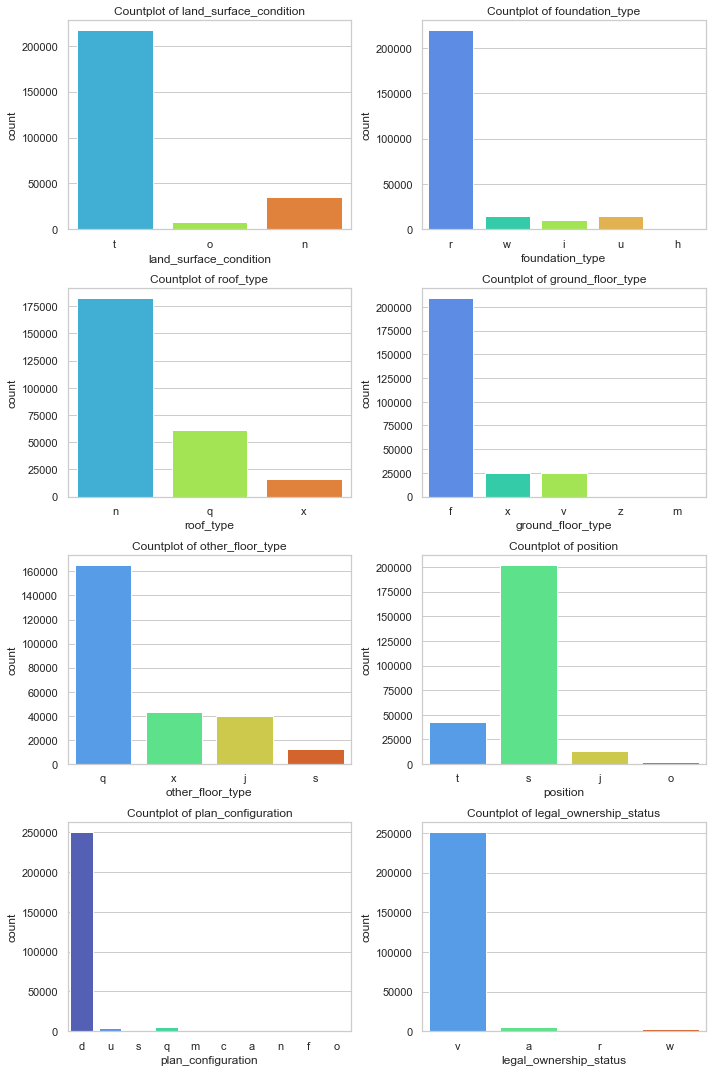

In [12]:
plt.figure(figsize=(10,15))
pltnum=1
for col in categorical_col:
    if pltnum<=8:
        ax=plt.subplot(4,2,pltnum)
        sns.countplot(x=data[col],palette="turbo")
        plt.title(f'Countplot of {col}')
        pltnum +=1

plt.tight_layout()
plt.show()

<ins>**Insights**</ins>

* `land_surface_condition`:-more land surface is of t(technical) type.
* `foundation_type`:-more buildings are of r(reinforced) type.
* `roof_type`:-more roofs are of n(normal) type.
* `ground_floor_type`:-more are of f(fine aggregate) type roofs.
* `other_floor_type`:- q type floors are more.
* `position`:-more buildings are in s(secondary) position.
* `plan_configuration`:-d type are more in plan_configuration.
* `legal_ownership_status`:-more are of private owned.



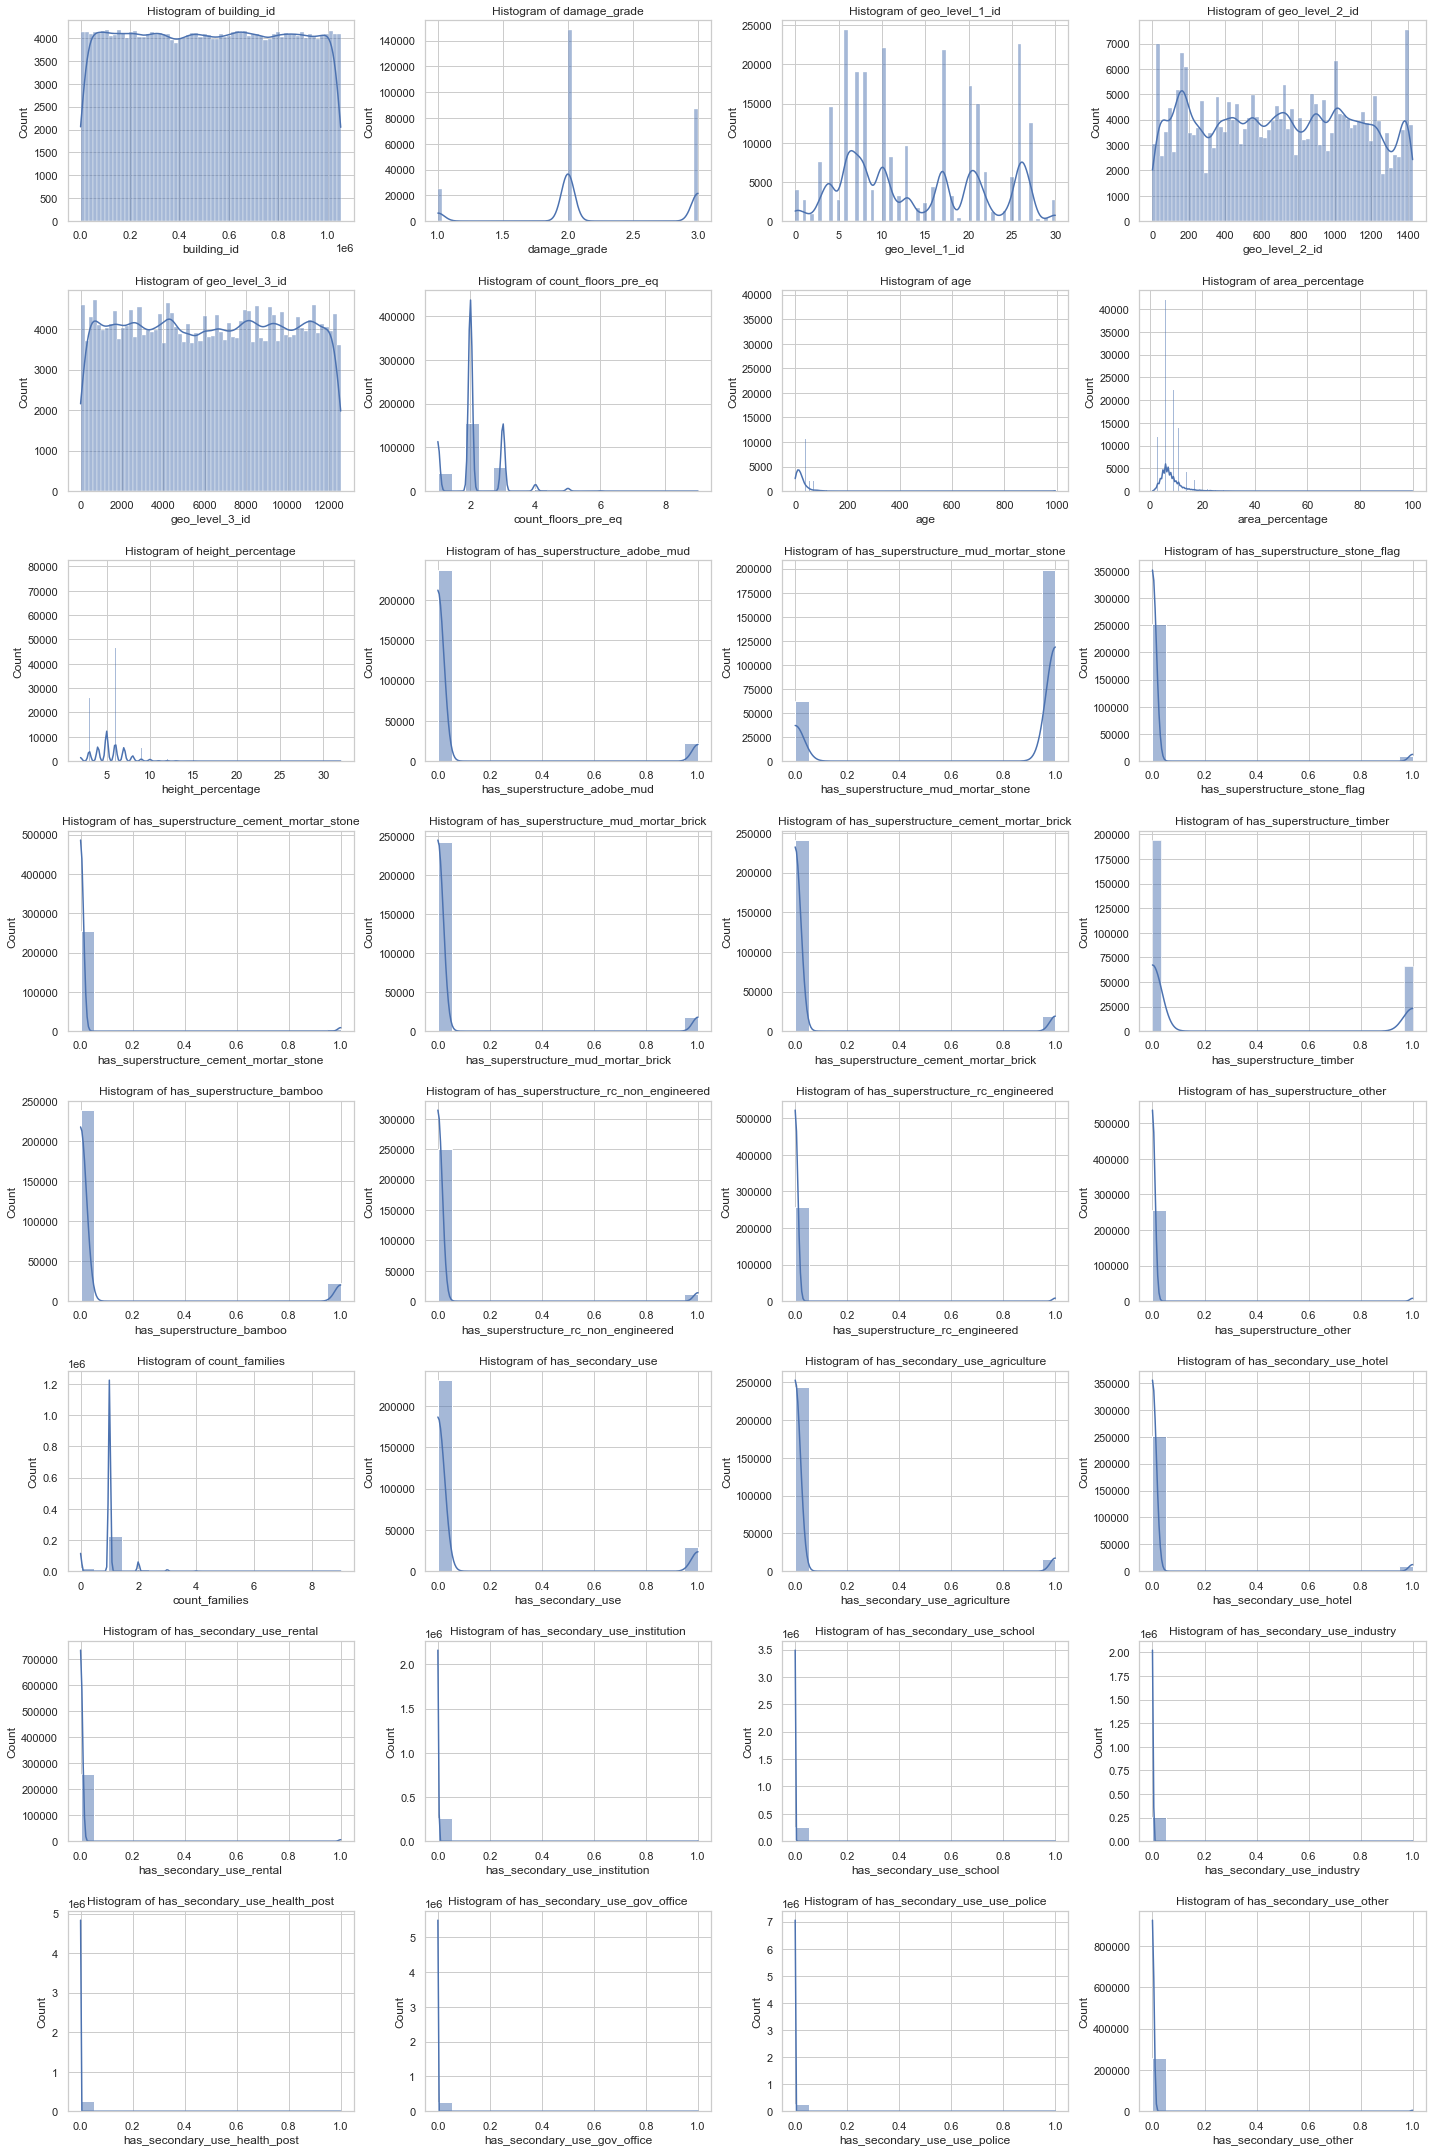

In [14]:
plt.figure(figsize=(20,30))

pltnum=1
for col in numerical_col:
    if pltnum<=32:
        ax=plt.subplot(8,4,pltnum)
        sns.histplot(x=data[col],kde=True)
        plt.title(f'Histogram of {col}')
        pltnum +=1
plt.tight_layout()

plt.show()

**Insights**

* 'has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other' - has discrete values `0 or 1` as its values, where all the features except has_superstructure_mud_mortar_brick has 0 as highest count.
* target column has 3 damage levels,the values are `imbalanced`
* 'building_id','geo_level_1_id', 'geo_level_2_id','geo_level_3_id' doesn't follow a particular pattern ,they are constant features and could be ignored
* age and area_percentage are postively skewed
* most of the buildings are newly build
* 2 storeyed buildings are more
* The independent homes are more compared to apartments


### Bivariant analysis

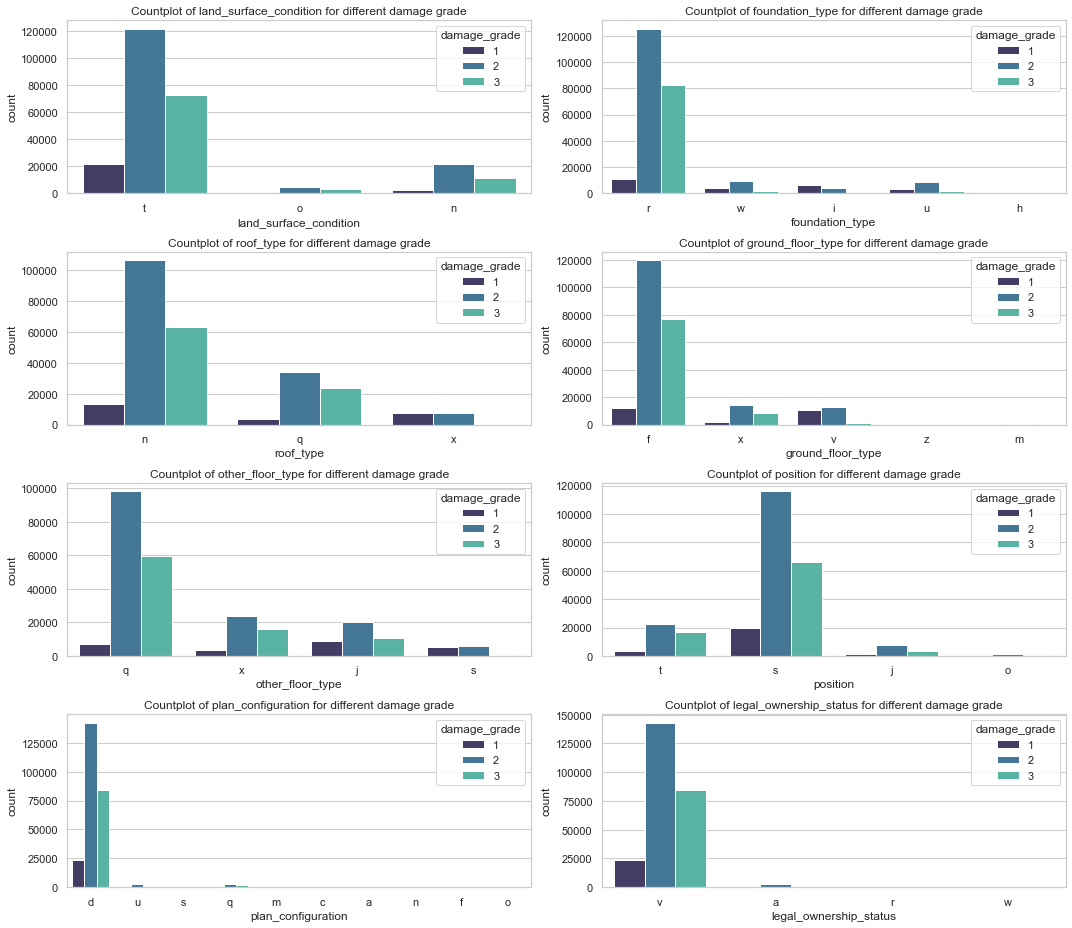

In [15]:
plt.figure(figsize=(15,13))
pltnum=1
for col in categorical_col:
    if pltnum<=8:
        ax=plt.subplot(4,2,pltnum)
        sns.countplot(x=data[col],hue=data['damage_grade'],palette="mako")
        plt.title(f'Countplot of {col} for different damage grade')
        pltnum +=1
plt.tight_layout()
plt.show()

**<ins>Insights</ins>**

* 
* 
* 

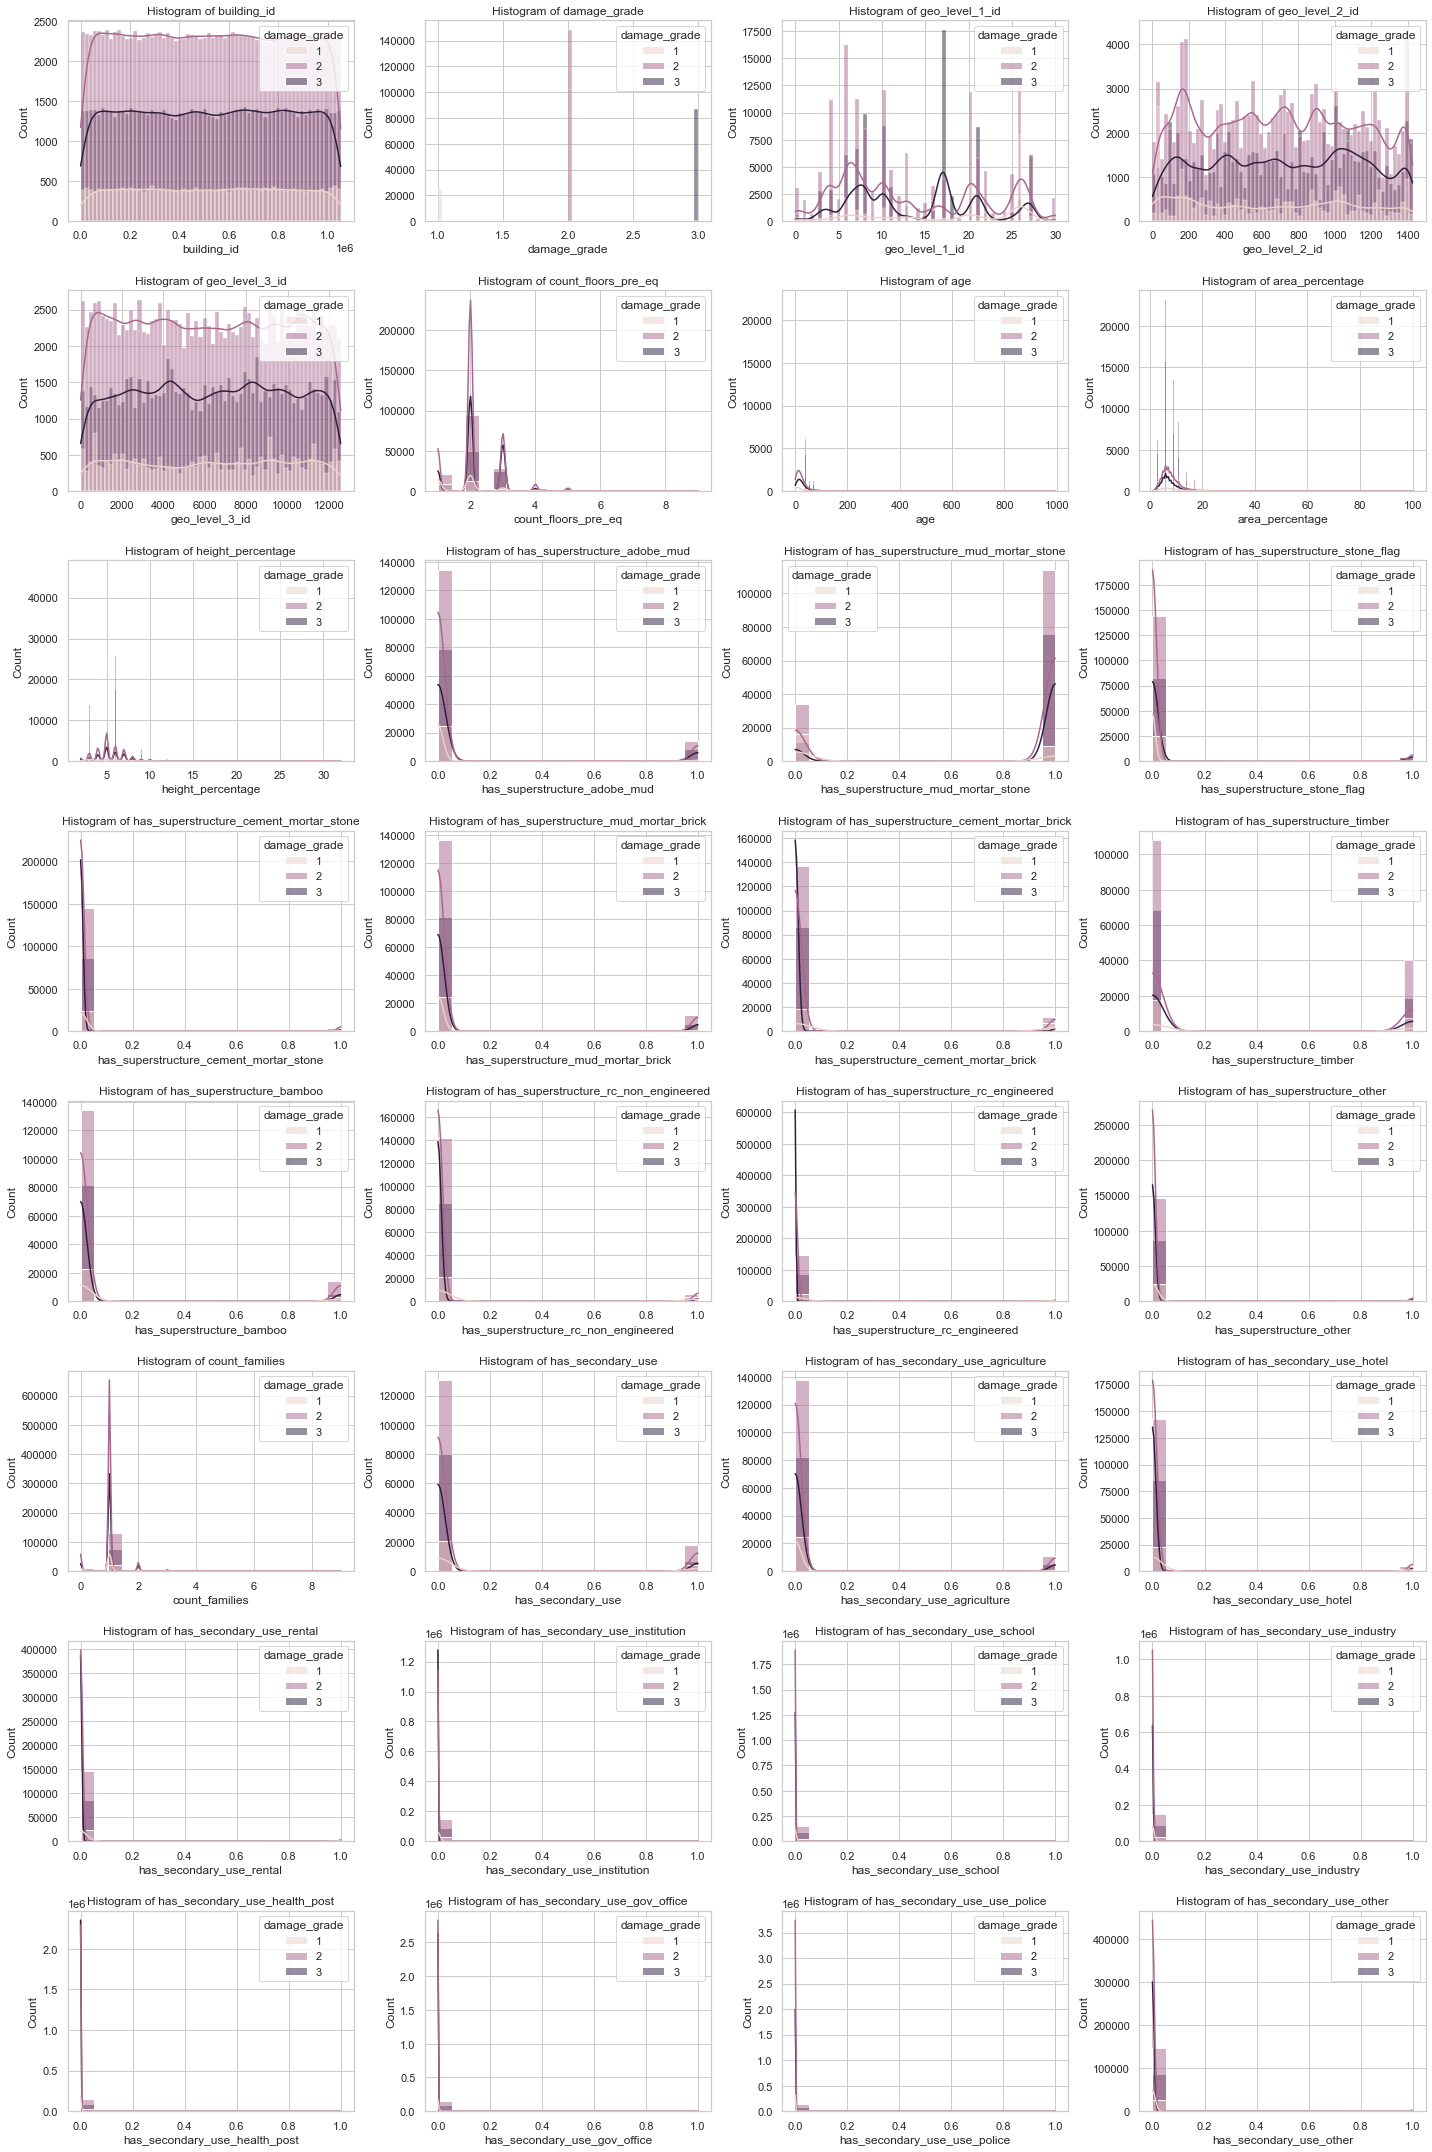

In [16]:
plt.figure(figsize=(20,30))
pltnum=1
for col in numerical_col:
    if pltnum<=32:
        ax=plt.subplot(8,4,pltnum)
        sns.histplot(x=data[col],hue=data['damage_grade'],kde=True)
        plt.title(f'Histogram of {col}')
        pltnum +=1
plt.tight_layout()
plt.show()

    max_rows_analyzed is smaller than dataset shape 260601...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 40)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  8
    Number of String-Categorical Columns =  8
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  22
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    39 Predictors classified...
        1 variable(s) removed since they were ID or low-info

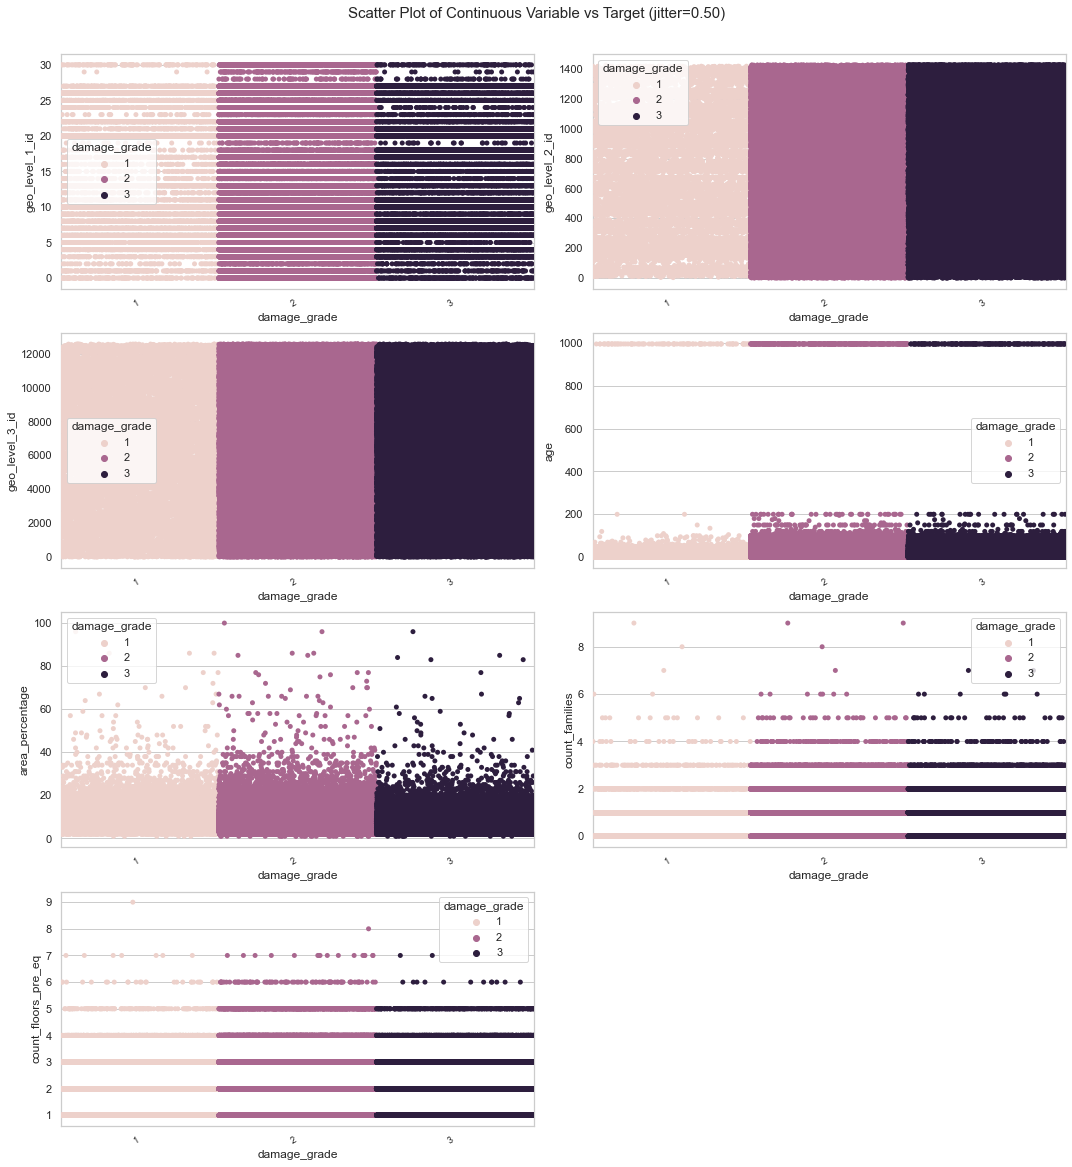

Total Number of Scatter Plots = 28


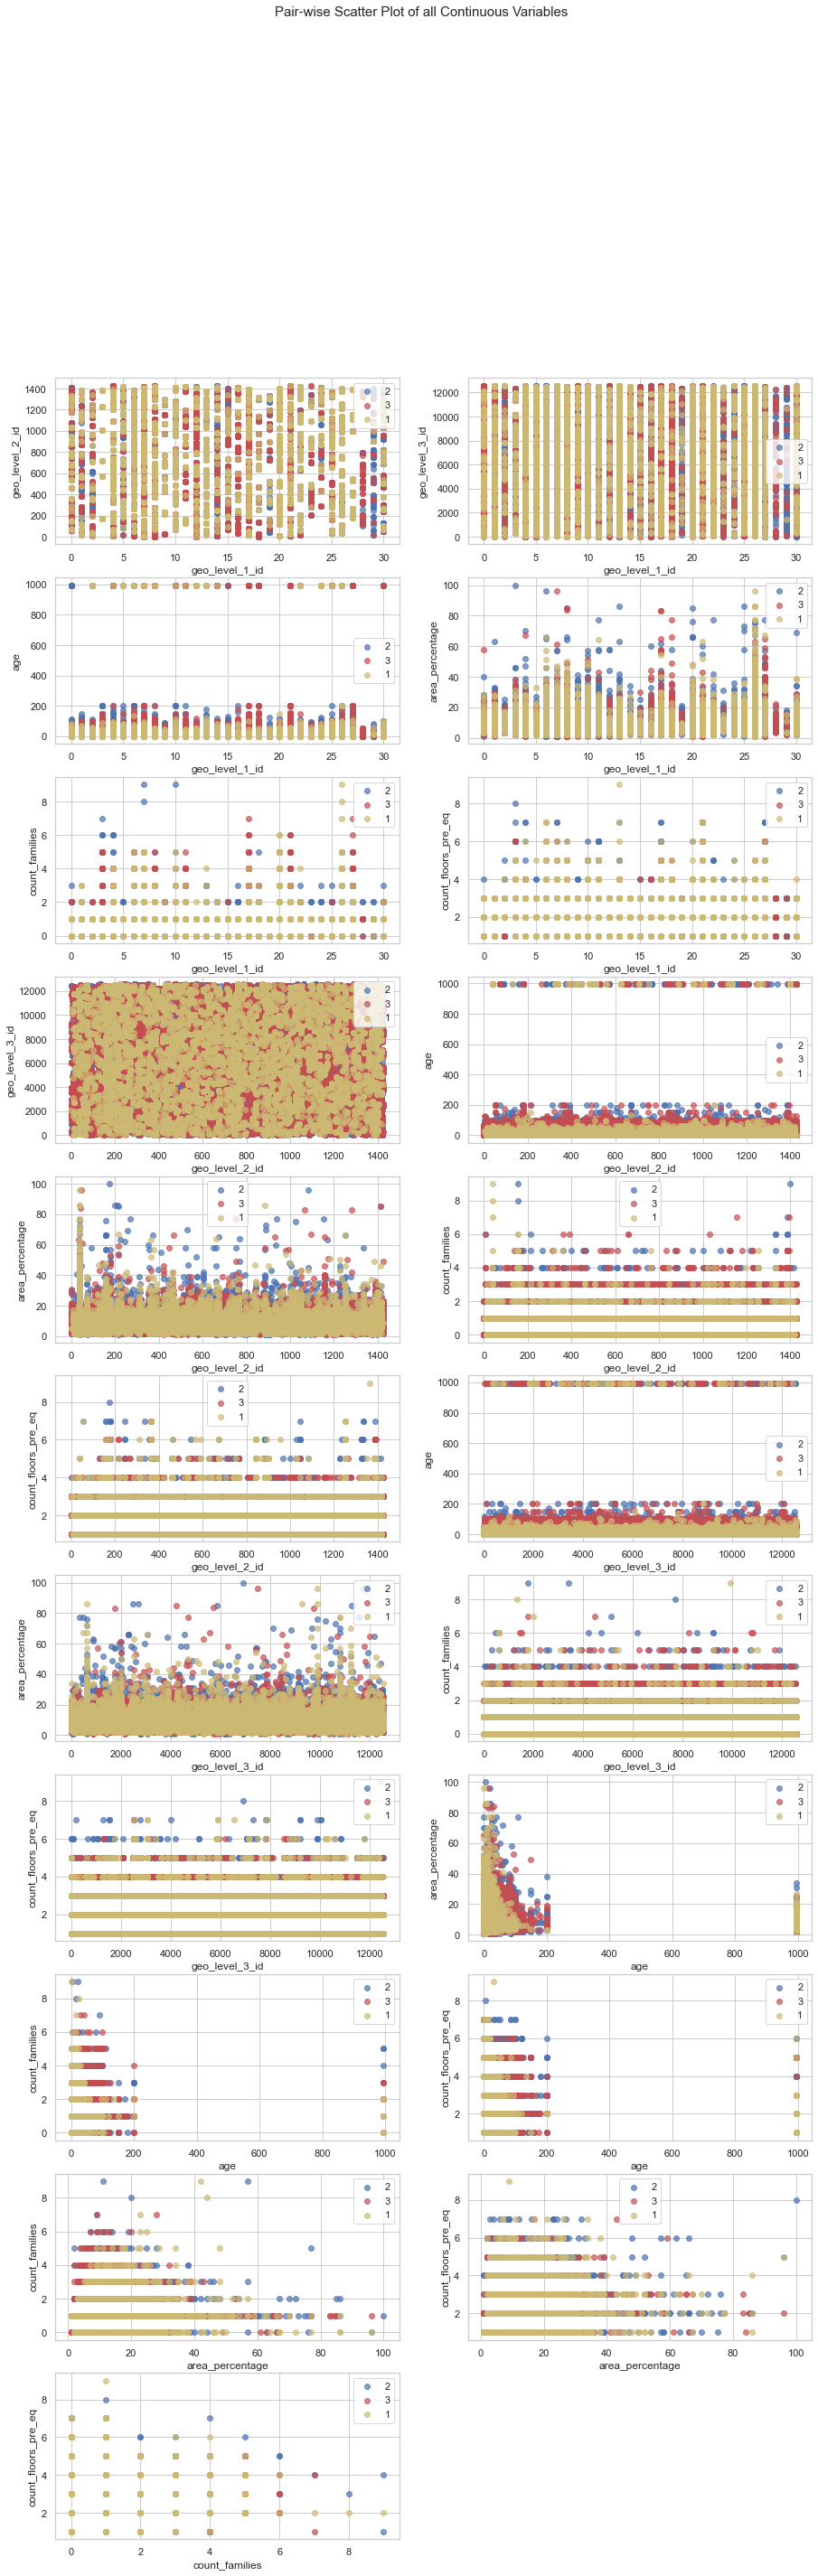

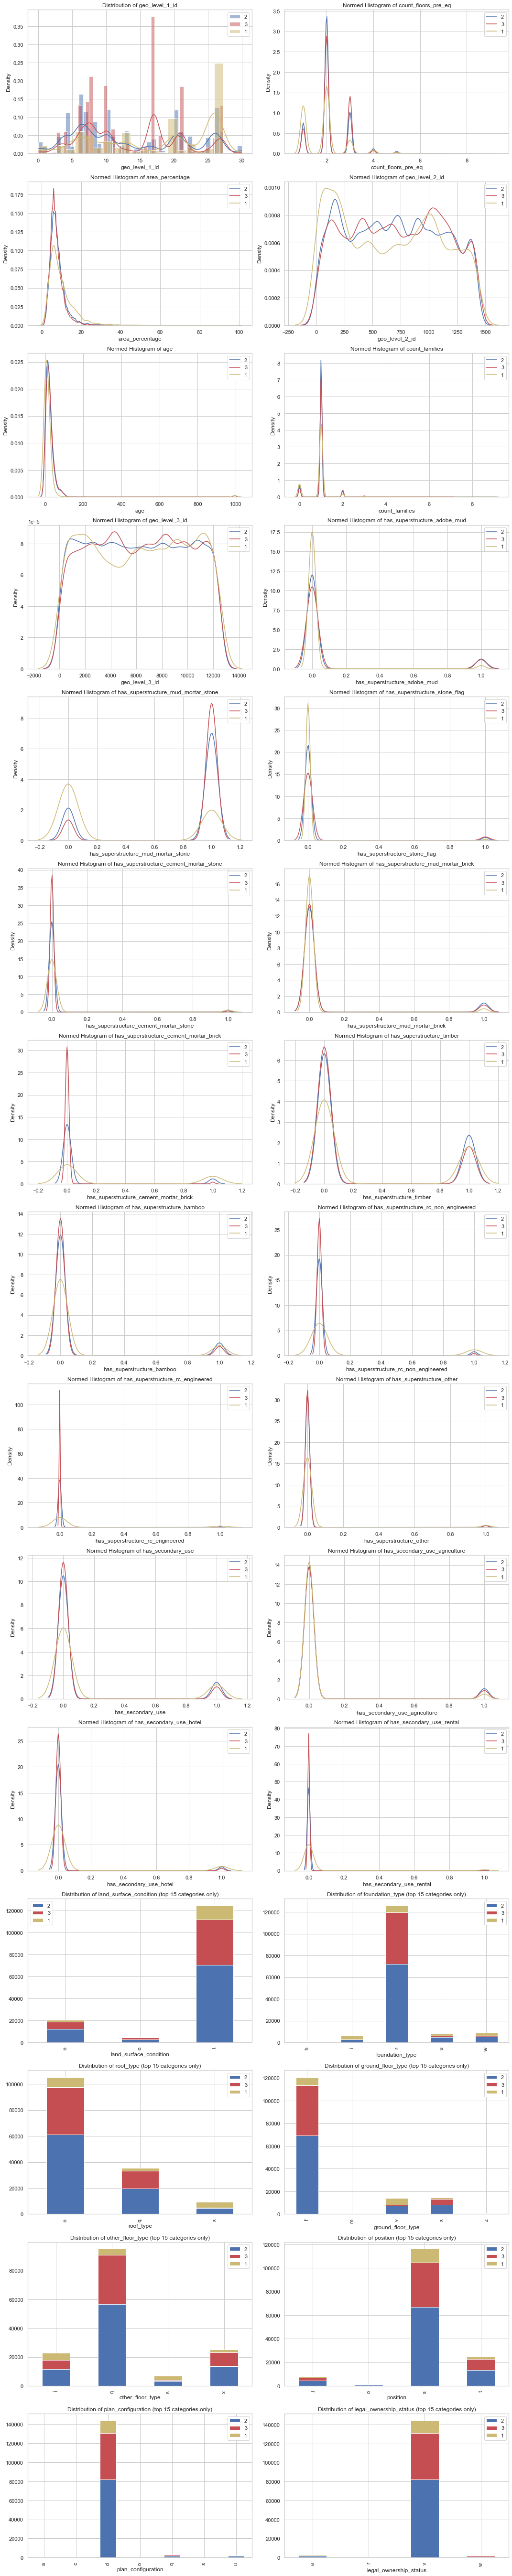

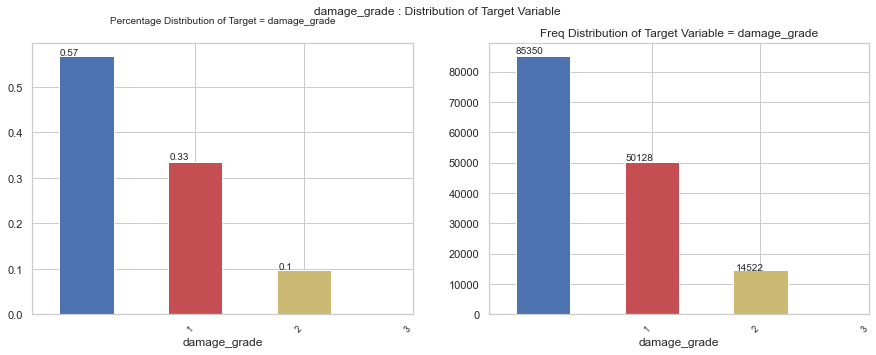

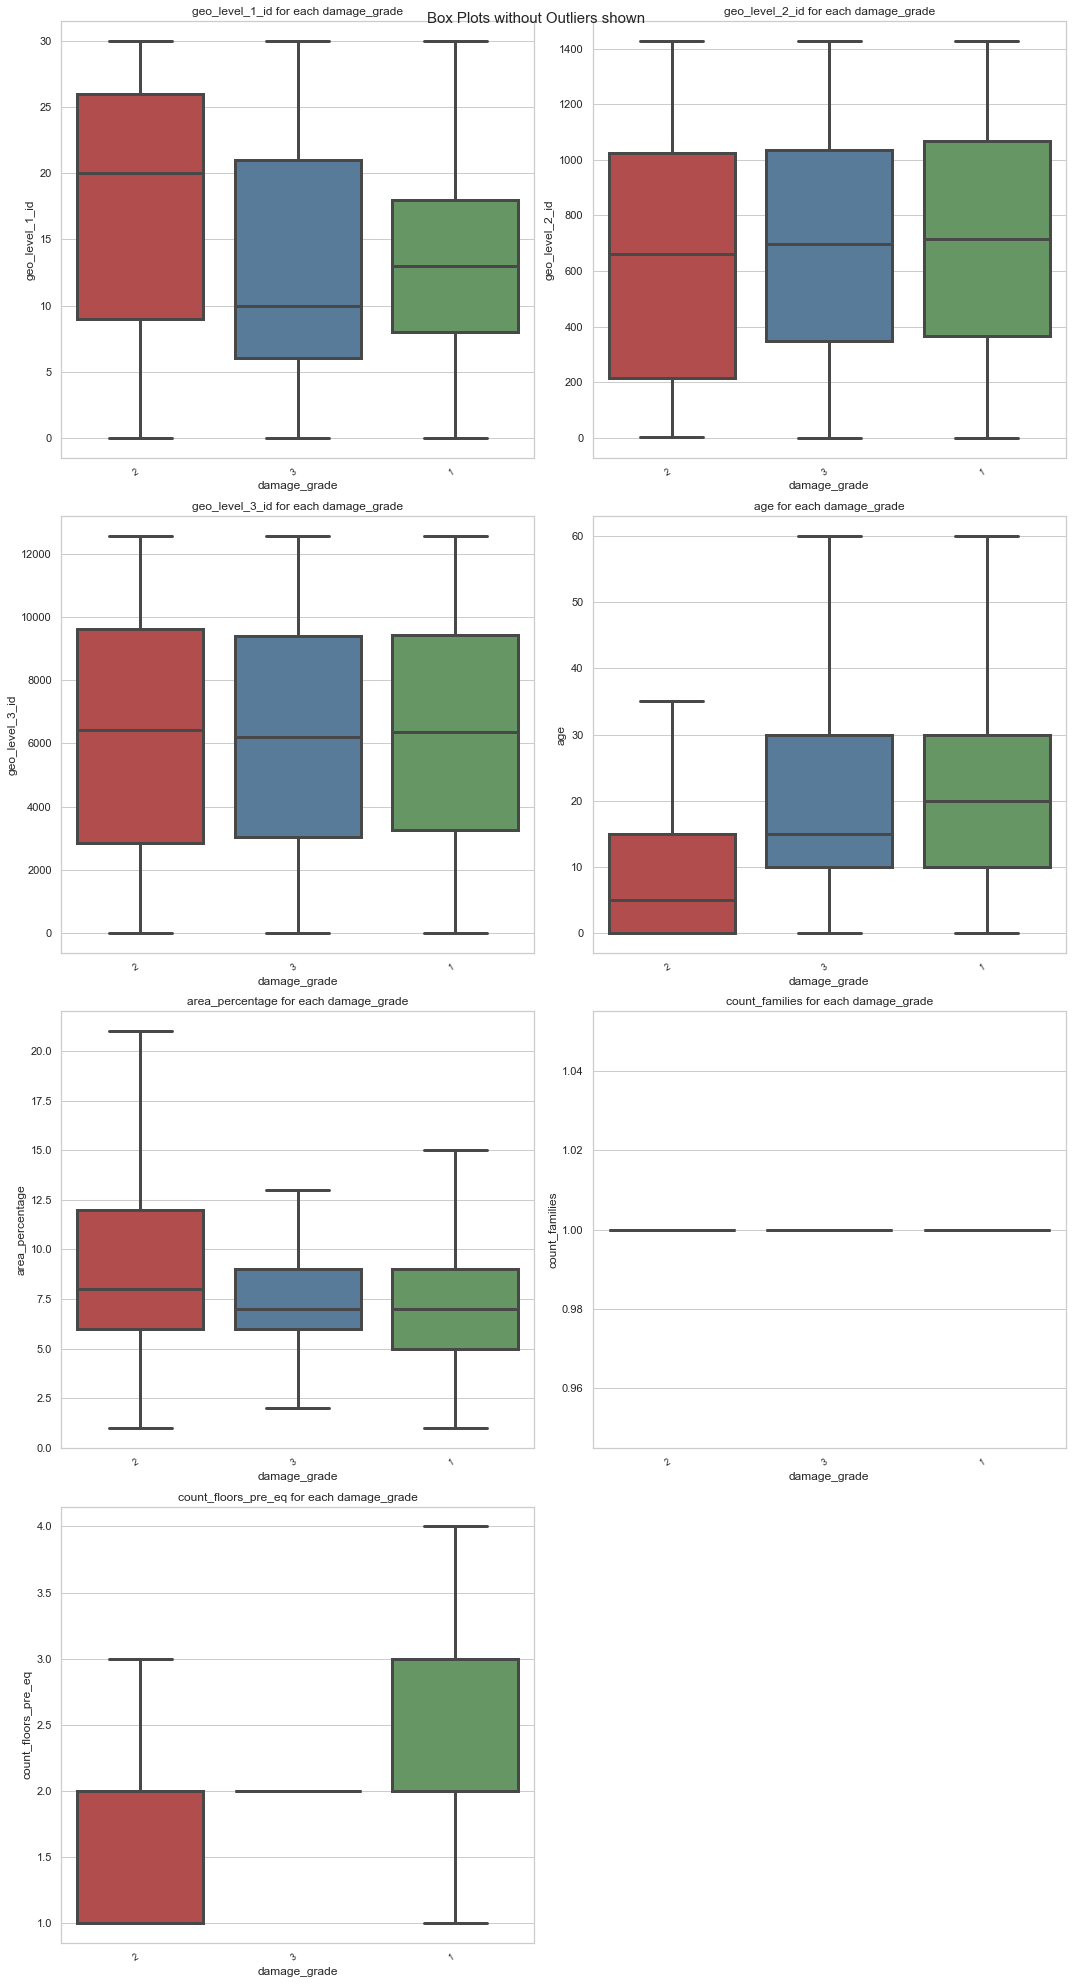

Could not draw some Heat Maps


<Figure size 1440x1440 with 0 Axes>

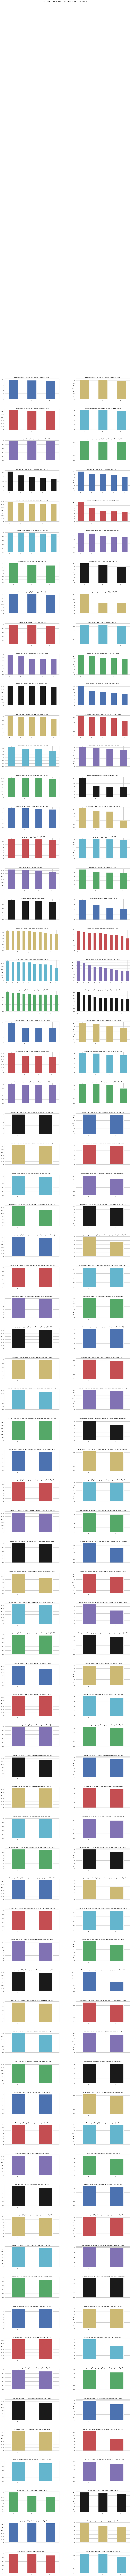

All Plots done
Time to run AutoViz = 269 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [17]:
# bivariate analysis
AV = AutoViz_Class()

dfte = AV.AutoViz('data.csv',sep=',', depVar='damage_grade', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='png',max_rows_analyzed=150000,max_cols_analyzed=30, 
               save_plot_dir='D:\\Datamites_Training\\Capstone Projects\\EarthquakeDamagePrediction\\Data')
plt.show()

**<ins>Insights</ins>**

* 
* 
* 

## Data Preprocessing

In [18]:
X = data.drop(columns=['damage_grade'])

In [19]:
num_col = X.select_dtypes(exclude="O").columns
cat_col = X.select_dtypes(include="O").columns

### Pipeline

In [21]:
# Outlier handling, scaling and frequency encoding

num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scale', MinMaxScaler())
])

cat_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('count_encode',CountEncoder()),
    ('scale', MinMaxScaler())

])

preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline',num_pipeline,num_col),
        ('cat_pipeline',cat_pipeline,cat_col)
    ]
)

In [22]:
X = preprocessor.fit_transform(X)

In [23]:
X.shape

(260601, 39)

In [24]:
df = pd.DataFrame(X,columns=['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other','land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'])

In [25]:
df

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0        0.762541       0.200000        0.341275        0.970637      
1        0.027377       0.266667        0.630694        0.223761      
2        0.090170       0.700000        0.254380        0.714013      
3        0.561175       0.733333        0.292922        0.850959      
4        0.191789       0.366667        0.091801        0.118405      
...             ...             ...             ...             ...   
260596   0.654015       0.833333        0.935529        0.128989      
260597   0.635827       0.566667        0.501051        0.163921      
260598   0.572220       0.566667        0.035739        0.649558      
260599   0.143794       0.866667        0.027330        0.147291      
260600   0.710009       0.700000        0.006307        0.724198      

        count_floors_pre_eq     age    area_percentage  height_percentage  \
0              0.125         0.030151     0.050505          0.100000        
1              0.125         0.010050     0.070707          0.166667        
2              0.125         0.010050     0.040404          0.100000        
3              0.125         0.010050     0.050505          0.100000        
4              0.250         0.030151     0.070707          0.233333        
...                     ...       ...              ...                ...   
260596         0.000         0.055276     0.050505          0.033333        
260597         0.125         0.000000     0.050505          0.100000        
260598         0.250         0.055276     0.050505          0.166667        
260599         0.125         0.010050     0.131313          0.133333        
260600         0.250         0.010050     0.060606          0.133333        

        has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
0                    1.0                              1.0                   
1                    0.0                              1.0                   
2                    0.0                              1.0                   
3                    0.0                              1.0                   
4                    1.0                              0.0                   
...                              ...                                  ...   
260596               0.0                              1.0                   
260597               0.0                              1.0                   
260598               0.0                              1.0                   
260599               0.0                              0.0                   
260600               0.0                              1.0                   

        has_superstructure_stone_flag  has_superstructure_cement_mortar_stone  \
0                    0.0                                 0.0                    
1                    0.0                                 0.0                    
2                    0.0                                 0.0                    
3                    0.0                                 0.0                    
4                    0.0                                 0.0                    
...                               ...                                     ...   
260596               0.0                                 0.0                    
260597               0.0                                 0.0                    
260598               0.0                                 0.0                    
260599               0.0                                 0.0                    
260600               0.0                                 0.0                    

        has_superstructure_mud_mortar_brick  \
0                       0.0                   
1                       0.0                   
2                       0.0                   
3                       0.0                   
4                       0.0                   
...                                     ...   
260

**Checking feature importance**

In [26]:
model = CatBoostClassifier()

model.fit(df, data['damage_grade'])

feature_importance_catboost = model.get_feature_importance()

# Create a DataFrame with feature names and their importance scores
feature_importance_df_catboost = pd.DataFrame({
    'Feature':
    df.columns,
    'Importance':
    feature_importance_catboost
})

# Sort the DataFrame by importance in descending order
feature_importance_df_catboost = feature_importance_df_catboost.sort_values(
    by='Importance', ascending=False)

# Print or return the top features
print("Top Features - CatBoost:")
feature_importance_df_catboost = feature_importance_df_catboost.head(16)
feature_importance_df_catboost

Learning rate set to 0.105084
0:	learn: 1.0426749	total: 164ms	remaining: 2m 43s
1:	learn: 0.9975364	total: 260ms	remaining: 2m 9s
2:	learn: 0.9605911	total: 348ms	remaining: 1m 55s
3:	learn: 0.9297411	total: 427ms	remaining: 1m 46s
4:	learn: 0.9043619	total: 501ms	remaining: 1m 39s
5:	learn: 0.8819064	total: 571ms	remaining: 1m 34s
6:	learn: 0.8632312	total: 642ms	remaining: 1m 31s
7:	learn: 0.8481845	total: 711ms	remaining: 1m 28s
8:	learn: 0.8345457	total: 780ms	remaining: 1m 25s
9:	learn: 0.8222961	total: 859ms	remaining: 1m 25s
10:	learn: 0.8111332	total: 936ms	remaining: 1m 24s
11:	learn: 0.8018982	total: 1000ms	remaining: 1m 22s
12:	learn: 0.7935622	total: 1.07s	remaining: 1m 21s
13:	learn: 0.7866916	total: 1.14s	remaining: 1m 20s
14:	learn: 0.7802538	total: 1.21s	remaining: 1m 19s
15:	learn: 0.7755001	total: 1.28s	remaining: 1m 18s
16:	learn: 0.7702933	total: 1.34s	remaining: 1m 17s
17:	learn: 0.7649444	total: 1.42s	remaining: 1m 17s
18:	learn: 0.7607804	total: 1.49s	remaining:

159:	learn: 0.6684429	total: 12.5s	remaining: 1m 5s
160:	learn: 0.6683134	total: 12.5s	remaining: 1m 5s
161:	learn: 0.6680646	total: 12.6s	remaining: 1m 5s
162:	learn: 0.6678456	total: 12.7s	remaining: 1m 5s
163:	learn: 0.6677360	total: 12.7s	remaining: 1m 4s
164:	learn: 0.6675049	total: 12.8s	remaining: 1m 4s
165:	learn: 0.6673615	total: 12.9s	remaining: 1m 4s
166:	learn: 0.6671722	total: 13s	remaining: 1m 4s
167:	learn: 0.6669525	total: 13.1s	remaining: 1m 5s
168:	learn: 0.6666618	total: 13.2s	remaining: 1m 5s
169:	learn: 0.6663867	total: 13.3s	remaining: 1m 5s
170:	learn: 0.6661485	total: 13.4s	remaining: 1m 5s
171:	learn: 0.6659393	total: 13.6s	remaining: 1m 5s
172:	learn: 0.6657002	total: 13.7s	remaining: 1m 5s
173:	learn: 0.6655571	total: 13.8s	remaining: 1m 5s
174:	learn: 0.6653358	total: 13.8s	remaining: 1m 5s
175:	learn: 0.6651396	total: 13.9s	remaining: 1m 5s
176:	learn: 0.6649405	total: 14s	remaining: 1m 5s
177:	learn: 0.6646557	total: 14.1s	remaining: 1m 4s
178:	learn: 0.66

318:	learn: 0.6435014	total: 26.4s	remaining: 56.4s
319:	learn: 0.6434112	total: 26.5s	remaining: 56.3s
320:	learn: 0.6432081	total: 26.6s	remaining: 56.2s
321:	learn: 0.6431374	total: 26.6s	remaining: 56.1s
322:	learn: 0.6429553	total: 26.7s	remaining: 56s
323:	learn: 0.6429087	total: 26.8s	remaining: 55.8s
324:	learn: 0.6428217	total: 26.8s	remaining: 55.8s
325:	learn: 0.6426417	total: 26.9s	remaining: 55.7s
326:	learn: 0.6425633	total: 27s	remaining: 55.5s
327:	learn: 0.6423585	total: 27.1s	remaining: 55.5s
328:	learn: 0.6422275	total: 27.1s	remaining: 55.4s
329:	learn: 0.6421905	total: 27.2s	remaining: 55.2s
330:	learn: 0.6420791	total: 27.3s	remaining: 55.1s
331:	learn: 0.6420314	total: 27.3s	remaining: 55s
332:	learn: 0.6419265	total: 27.4s	remaining: 54.9s
333:	learn: 0.6418497	total: 27.5s	remaining: 54.8s
334:	learn: 0.6417863	total: 27.6s	remaining: 54.7s
335:	learn: 0.6416870	total: 27.6s	remaining: 54.6s
336:	learn: 0.6416219	total: 27.7s	remaining: 54.5s
337:	learn: 0.6415

477:	learn: 0.6279687	total: 37.8s	remaining: 41.3s
478:	learn: 0.6278917	total: 37.9s	remaining: 41.2s
479:	learn: 0.6278510	total: 37.9s	remaining: 41.1s
480:	learn: 0.6277775	total: 38s	remaining: 41s
481:	learn: 0.6276795	total: 38.1s	remaining: 40.9s
482:	learn: 0.6276037	total: 38.2s	remaining: 40.8s
483:	learn: 0.6275029	total: 38.2s	remaining: 40.8s
484:	learn: 0.6274349	total: 38.3s	remaining: 40.7s
485:	learn: 0.6272832	total: 38.4s	remaining: 40.6s
486:	learn: 0.6272063	total: 38.4s	remaining: 40.5s
487:	learn: 0.6271280	total: 38.5s	remaining: 40.4s
488:	learn: 0.6270753	total: 38.6s	remaining: 40.3s
489:	learn: 0.6270205	total: 38.6s	remaining: 40.2s
490:	learn: 0.6269807	total: 38.7s	remaining: 40.1s
491:	learn: 0.6269257	total: 38.8s	remaining: 40s
492:	learn: 0.6268779	total: 38.8s	remaining: 40s
493:	learn: 0.6268178	total: 38.9s	remaining: 39.9s
494:	learn: 0.6266435	total: 39s	remaining: 39.8s
495:	learn: 0.6265918	total: 39.1s	remaining: 39.7s
496:	learn: 0.6265020	

637:	learn: 0.6170456	total: 49.2s	remaining: 27.9s
638:	learn: 0.6169655	total: 49.3s	remaining: 27.9s
639:	learn: 0.6168756	total: 49.4s	remaining: 27.8s
640:	learn: 0.6167537	total: 49.5s	remaining: 27.7s
641:	learn: 0.6166676	total: 49.6s	remaining: 27.6s
642:	learn: 0.6166056	total: 49.6s	remaining: 27.6s
643:	learn: 0.6165189	total: 49.7s	remaining: 27.5s
644:	learn: 0.6164845	total: 49.8s	remaining: 27.4s
645:	learn: 0.6163973	total: 49.9s	remaining: 27.3s
646:	learn: 0.6163647	total: 49.9s	remaining: 27.2s
647:	learn: 0.6163178	total: 50s	remaining: 27.2s
648:	learn: 0.6162574	total: 50.1s	remaining: 27.1s
649:	learn: 0.6162020	total: 50.1s	remaining: 27s
650:	learn: 0.6161135	total: 50.2s	remaining: 26.9s
651:	learn: 0.6160678	total: 50.3s	remaining: 26.8s
652:	learn: 0.6159100	total: 50.3s	remaining: 26.8s
653:	learn: 0.6158563	total: 50.4s	remaining: 26.7s
654:	learn: 0.6157889	total: 50.5s	remaining: 26.6s
655:	learn: 0.6157525	total: 50.5s	remaining: 26.5s
656:	learn: 0.61

798:	learn: 0.6080096	total: 1m	remaining: 15.3s
799:	learn: 0.6079812	total: 1m	remaining: 15.2s
800:	learn: 0.6079376	total: 1m	remaining: 15.1s
801:	learn: 0.6078365	total: 1m	remaining: 15s
802:	learn: 0.6078121	total: 1m	remaining: 14.9s
803:	learn: 0.6077815	total: 1m	remaining: 14.9s
804:	learn: 0.6077191	total: 1m 1s	remaining: 14.8s
805:	learn: 0.6076844	total: 1m 1s	remaining: 14.7s
806:	learn: 0.6076407	total: 1m 1s	remaining: 14.6s
807:	learn: 0.6075918	total: 1m 1s	remaining: 14.6s
808:	learn: 0.6075180	total: 1m 1s	remaining: 14.5s
809:	learn: 0.6074956	total: 1m 1s	remaining: 14.4s
810:	learn: 0.6073639	total: 1m 1s	remaining: 14.3s
811:	learn: 0.6073413	total: 1m 1s	remaining: 14.2s
812:	learn: 0.6072987	total: 1m 1s	remaining: 14.2s
813:	learn: 0.6072708	total: 1m 1s	remaining: 14.1s
814:	learn: 0.6072417	total: 1m 1s	remaining: 14s
815:	learn: 0.6071855	total: 1m 1s	remaining: 13.9s
816:	learn: 0.6071340	total: 1m 1s	remaining: 13.9s
817:	learn: 0.6070199	total: 1m 1s

958:	learn: 0.5999596	total: 1m 12s	remaining: 3.09s
959:	learn: 0.5999001	total: 1m 12s	remaining: 3.01s
960:	learn: 0.5998525	total: 1m 12s	remaining: 2.94s
961:	learn: 0.5997545	total: 1m 12s	remaining: 2.86s
962:	learn: 0.5996715	total: 1m 12s	remaining: 2.79s
963:	learn: 0.5996368	total: 1m 12s	remaining: 2.71s
964:	learn: 0.5995896	total: 1m 12s	remaining: 2.64s
965:	learn: 0.5995559	total: 1m 12s	remaining: 2.56s
966:	learn: 0.5995354	total: 1m 12s	remaining: 2.49s
967:	learn: 0.5995119	total: 1m 12s	remaining: 2.41s
968:	learn: 0.5994779	total: 1m 12s	remaining: 2.33s
969:	learn: 0.5994561	total: 1m 13s	remaining: 2.26s
970:	learn: 0.5993571	total: 1m 13s	remaining: 2.18s
971:	learn: 0.5992860	total: 1m 13s	remaining: 2.11s
972:	learn: 0.5992197	total: 1m 13s	remaining: 2.03s
973:	learn: 0.5991633	total: 1m 13s	remaining: 1.96s
974:	learn: 0.5991350	total: 1m 13s	remaining: 1.88s
975:	learn: 0.5991079	total: 1m 13s	remaining: 1.81s
976:	learn: 0.5990958	total: 1m 13s	remaining:

Feature                  Importance
1                           geo_level_1_id   43.339947
2                           geo_level_2_id   15.464393
3                           geo_level_3_id    4.885660
32                         foundation_type    3.999813
5                                      age    3.862410
9      has_superstructure_mud_mortar_stone    3.591616
35                        other_floor_type    2.562591
34                       ground_floor_type    2.524384
4                      count_floors_pre_eq    2.135636
7                        height_percentage    2.045902
6                          area_percentage    1.986807
33                               roof_type    1.891953
14               has_superstructure_timber    1.851640
13  has_superstructure_cement_mortar_brick    1.138036
8             has_superstructure_adobe_mud    1.034329
10           has_superstructure_stone_flag    1.024317

## Model Creation

In [27]:
selected_feature_names = feature_importance_df_catboost['Feature'].to_list()

In [28]:
X = df[selected_feature_names]
y = data['damage_grade']

As the data is imbalanced, the training data is balanced using SMOTE

In [36]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({2: 148259, 3: 87218, 1: 25124})


In [37]:
sm = SMOTE(sampling_strategy='all',random_state=42)

X_train_resampled, y_train_resampled = sm.fit_resample(X,y)

print('Original dataset shape %s' % Counter(y_train_resampled))

Original dataset shape Counter({3: 148259, 2: 148259, 1: 148259})


In [38]:
X_train,X_test,y_train,y_test = train_test_split(X_train_resampled,y_train_resampled,test_size=0.3,random_state=42)
X_train.shape,X_test.shape

((311343, 16), (133434, 16))

In [39]:
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true,predicted)
    f1 = f1_score(true,predicted,average='weighted')
    precision = precision_score(true,predicted,average='weighted')
    recall = recall_score(true,predicted,average='weighted')
    
    return accuracy,f1,precision, recall

In [40]:
params={
        "Decision Tree": {
            'criterion':["gini", "entropy", "log_loss"],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        },
        "Random Forest":{
            'criterion':["gini", "entropy", "log_loss"],
            'n_estimators': [50, 100, 200], 
            'max_depth': [None, 10, 20, 30], 
            'min_samples_split': [2, 5, 10]
        },
        "Logistic Regression":{
            'C': [0.001, 0.01, 0.1, 1, 10, 100], 
            'penalty': ['l1', 'l2']
        },
        "KNN":{
            'n_neighbors': [3, 5, 7, 9], 
            'weights': ['uniform', 'distance'],
            'algorithm':['ball_tree','kd_tree','brute']
        },
        "GradientBoost":{
            'n_estimators': [50, 100, 200], 
            'learning_rate': [0.01, 0.1, 1], 
            'max_depth': [3, 5, 7]
        },
        "XGBClassifier":{
            'learning_rate':[.1,.01,.05,.001],
            'n_estimators': [8,16,32,64,128,256]
        },
        "CatBoostClassifier":{
            'iterations': [50, 100, 200], 
            'learning_rate': [0.01, 0.1, 1], 
            'depth': [4, 6, 8]
        },
        "AdaBoost":{
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1]
        },
        "LightGBMClassifier":{
            'n_estimators': [50, 100, 200], 
            'learning_rate': [0.01, 0.1, 1], 
            'max_depth': [3, 5, 7]
           },
        "MLPClassifier" : {
            'hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'alpha': [0.0001, 0.001, 0.01]
        }

}


In [52]:
model_results = {}
class_mapping = {label: idx for idx, label in enumerate(np.unique(y_train))}
y_train_mapped = np.vectorize(class_mapping.get)(y_train)

class_mapping = {label: idx for idx, label in enumerate(np.unique(y_test))}
y_test_mapped = np.vectorize(class_mapping.get)(y_test)


def run_model(model_name, model):
    '''
    Function to run the model and return the results
    '''

    model.fit(X_train, y_train_mapped)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Map class labels for test set if needed
    y_test_mapped = np.vectorize(class_mapping.get)(y_test)

    # Evaluate Train and Test dataset
    model_train_accuracy, model_train_f1, model_train_precision, model_train_recall = evaluate_model(
        y_train_mapped, y_train_pred)
    model_test_accuracy, model_test_f1, model_test_precision, model_test_recall = evaluate_model(
        y_test_mapped, y_test_pred)

    cross_val_mean = cross_val_score(model,
                                     X_train,
                                     y_train_mapped,
                                     cv=5,
                                     scoring='f1_weighted').mean()
    cross_val_std = cross_val_score(model,
                                    X_train,
                                    y_train_mapped,
                                    cv=5,
                                    scoring='f1_weighted').std()

    print(model_name)

    print('Model performance for Training set')
    print("- Accuracy : {:.4f}".format(model_train_accuracy))
    print("- F1_score : {:.4f}".format(model_train_f1))
    print("- Precision Score: {:.4f}".format(model_train_precision))
    print("- Recall Score: {:.4f}".format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1_score: {:.4f}".format(model_test_f1))
    print("- Precision Score: {:.4f}".format(model_test_precision))
    print("- Recall Score: {:.4f}".format(model_test_recall))

    print('----------------------------------')

    print("Crossvalidate Score(mean): {:.4f}".format(cross_val_mean))
    print("Crossvalidate Std: {:.4f}".format(cross_val_std))

    model_results[model_name] = {
        'accuracy_train': model_train_accuracy,
        'accuracy_test': model_test_accuracy,
        'f1_train': model_train_f1,
        'f1_test': model_test_f1
    }

    print('=' * 35)


#     print('\n')

In [51]:
def hyper_tuning(model_name,model):
        '''
        Function to do hyperparameter tuning
        '''
        para = params[model_name]

        gs = RandomizedSearchCV(model,para,cv=5,scoring='f1_weighted',n_jobs=-1)
        gs.fit(X_train,y_train_mapped)
        
        model.set_params(**gs.best_params_)
        run_model(model_name,model)
        

In [68]:
hyper_tuning('Decision Tree',DecisionTreeClassifier())

Decision Tree
Model performance for Training set
- Accuracy : 0.9613
- F1_score : 0.9612
- Precision Score: 0.9612
- Recall Score: 0.9613
----------------------------------
Model performance for Test set
- Accuracy: 0.7591
- F1_score: 0.7585
- Precision Score: 0.7580
- Recall Score: 0.7591
----------------------------------
Crossvalidate Score(mean): 0.7531
Crossvalidate Std: 0.0009


In [69]:
hyper_tuning('Logistic Regression',LogisticRegression())

Logistic Regression
Model performance for Training set
- Accuracy : 0.5653
- F1_score : 0.5559
- Precision Score: 0.5681
- Recall Score: 0.5653
----------------------------------
Model performance for Test set
- Accuracy: 0.5634
- F1_score: 0.5539
- Precision Score: 0.5665
- Recall Score: 0.5634
----------------------------------
Crossvalidate Score(mean): 0.5559
Crossvalidate Std: 0.0014


In [70]:
run_model('KNN',KNeighborsClassifier())

KNN
Model performance for Training set
- Accuracy : 0.8383
- F1_score : 0.8346
- Precision Score: 0.8370
- Recall Score: 0.8383
----------------------------------
Model performance for Test set
- Accuracy: 0.7693
- F1_score: 0.7628
- Precision Score: 0.7640
- Recall Score: 0.7693
----------------------------------
Crossvalidate Score(mean): 0.7481
Crossvalidate Std: 0.0012


In [67]:
run_model('XGBClassifier',XGBClassifier())

XGBClassifier
Model performance for Training set
- Accuracy : 0.8158
- F1_score : 0.8163
- Precision Score: 0.8208
- Recall Score: 0.8158
----------------------------------
Model performance for Test set
- Accuracy: 0.8053
- F1_score: 0.8058
- Precision Score: 0.8101
- Recall Score: 0.8053
----------------------------------
Crossvalidate Score(mean): 0.8034
Crossvalidate Std: 0.0012


In [55]:
run_model('Random Forest',RandomForestClassifier())

Random Forest
Model performance for Training set
- Accuracy : 0.9852
- F1_score : 0.9851
- Precision Score: 0.9851
- Recall Score: 0.9852
----------------------------------
Model performance for Test set
- Accuracy: 0.8214
- F1_score: 0.8210
- Precision Score: 0.8212
- Recall Score: 0.8214
----------------------------------
Crossvalidate Score(mean): 0.8141
Crossvalidate Std: 0.0008


In [ ]:
# hyper_tuning('Random Forest',RandomForestClassifier())

In [56]:
run_model('CatBoostClassifier',CatBoostClassifier())

Learning rate set to 0.106042
0:	learn: 1.0484991	total: 397ms	remaining: 6m 36s
1:	learn: 1.0100142	total: 653ms	remaining: 5m 25s
2:	learn: 0.9792965	total: 842ms	remaining: 4m 39s
3:	learn: 0.9513540	total: 1.03s	remaining: 4m 15s
4:	learn: 0.9289994	total: 1.21s	remaining: 4m
5:	learn: 0.9098221	total: 1.4s	remaining: 3m 52s
6:	learn: 0.8929124	total: 1.57s	remaining: 3m 43s
7:	learn: 0.8771896	total: 1.75s	remaining: 3m 36s
8:	learn: 0.8632614	total: 1.91s	remaining: 3m 30s
9:	learn: 0.8488977	total: 2.08s	remaining: 3m 25s
10:	learn: 0.8382686	total: 2.24s	remaining: 3m 21s
11:	learn: 0.8271863	total: 2.4s	remaining: 3m 17s
12:	learn: 0.8184242	total: 2.55s	remaining: 3m 13s
13:	learn: 0.8082797	total: 2.72s	remaining: 3m 11s
14:	learn: 0.7998942	total: 2.91s	remaining: 3m 10s
15:	learn: 0.7916134	total: 3.07s	remaining: 3m 9s
16:	learn: 0.7854996	total: 3.22s	remaining: 3m 6s
17:	learn: 0.7768362	total: 3.38s	remaining: 3m 4s
18:	learn: 0.7702598	total: 3.54s	remaining: 3m 2s
19

158:	learn: 0.5543323	total: 25.5s	remaining: 2m 15s
159:	learn: 0.5538668	total: 25.7s	remaining: 2m 14s
160:	learn: 0.5536174	total: 25.9s	remaining: 2m 14s
161:	learn: 0.5529597	total: 26s	remaining: 2m 14s
162:	learn: 0.5524521	total: 26.2s	remaining: 2m 14s
163:	learn: 0.5520799	total: 26.3s	remaining: 2m 14s
164:	learn: 0.5513377	total: 26.5s	remaining: 2m 13s
165:	learn: 0.5510065	total: 26.6s	remaining: 2m 13s
166:	learn: 0.5503649	total: 26.8s	remaining: 2m 13s
167:	learn: 0.5495139	total: 26.9s	remaining: 2m 13s
168:	learn: 0.5489378	total: 27.1s	remaining: 2m 13s
169:	learn: 0.5487048	total: 27.2s	remaining: 2m 12s
170:	learn: 0.5478197	total: 27.4s	remaining: 2m 12s
171:	learn: 0.5470986	total: 27.5s	remaining: 2m 12s
172:	learn: 0.5465504	total: 27.7s	remaining: 2m 12s
173:	learn: 0.5459567	total: 28s	remaining: 2m 12s
174:	learn: 0.5456524	total: 28.2s	remaining: 2m 13s
175:	learn: 0.5453188	total: 28.4s	remaining: 2m 12s
176:	learn: 0.5449969	total: 28.5s	remaining: 2m 1

316:	learn: 0.5070729	total: 51.2s	remaining: 1m 50s
317:	learn: 0.5069579	total: 51.4s	remaining: 1m 50s
318:	learn: 0.5068089	total: 51.5s	remaining: 1m 49s
319:	learn: 0.5065830	total: 51.6s	remaining: 1m 49s
320:	learn: 0.5064481	total: 51.8s	remaining: 1m 49s
321:	learn: 0.5063277	total: 51.9s	remaining: 1m 49s
322:	learn: 0.5061991	total: 52.1s	remaining: 1m 49s
323:	learn: 0.5060429	total: 52.2s	remaining: 1m 48s
324:	learn: 0.5059794	total: 52.3s	remaining: 1m 48s
325:	learn: 0.5058177	total: 52.5s	remaining: 1m 48s
326:	learn: 0.5055860	total: 52.7s	remaining: 1m 48s
327:	learn: 0.5054835	total: 52.8s	remaining: 1m 48s
328:	learn: 0.5053324	total: 53s	remaining: 1m 48s
329:	learn: 0.5052212	total: 53.1s	remaining: 1m 47s
330:	learn: 0.5050754	total: 53.3s	remaining: 1m 47s
331:	learn: 0.5048859	total: 53.4s	remaining: 1m 47s
332:	learn: 0.5046455	total: 53.6s	remaining: 1m 47s
333:	learn: 0.5044211	total: 53.7s	remaining: 1m 47s
334:	learn: 0.5042711	total: 53.8s	remaining: 1m

471:	learn: 0.4854225	total: 1m 15s	remaining: 1m 24s
472:	learn: 0.4853649	total: 1m 15s	remaining: 1m 24s
473:	learn: 0.4853073	total: 1m 16s	remaining: 1m 24s
474:	learn: 0.4851990	total: 1m 16s	remaining: 1m 24s
475:	learn: 0.4851432	total: 1m 16s	remaining: 1m 23s
476:	learn: 0.4850265	total: 1m 16s	remaining: 1m 23s
477:	learn: 0.4849289	total: 1m 16s	remaining: 1m 23s
478:	learn: 0.4847999	total: 1m 16s	remaining: 1m 23s
479:	learn: 0.4846548	total: 1m 16s	remaining: 1m 23s
480:	learn: 0.4845198	total: 1m 16s	remaining: 1m 23s
481:	learn: 0.4844512	total: 1m 17s	remaining: 1m 22s
482:	learn: 0.4843860	total: 1m 17s	remaining: 1m 22s
483:	learn: 0.4843445	total: 1m 17s	remaining: 1m 22s
484:	learn: 0.4841789	total: 1m 17s	remaining: 1m 22s
485:	learn: 0.4839875	total: 1m 17s	remaining: 1m 22s
486:	learn: 0.4839321	total: 1m 17s	remaining: 1m 22s
487:	learn: 0.4838290	total: 1m 18s	remaining: 1m 21s
488:	learn: 0.4837195	total: 1m 18s	remaining: 1m 21s
489:	learn: 0.4836676	total:

625:	learn: 0.4702978	total: 1m 38s	remaining: 59.1s
626:	learn: 0.4702546	total: 1m 39s	remaining: 58.9s
627:	learn: 0.4701598	total: 1m 39s	remaining: 58.8s
628:	learn: 0.4701108	total: 1m 39s	remaining: 58.6s
629:	learn: 0.4700731	total: 1m 39s	remaining: 58.5s
630:	learn: 0.4700041	total: 1m 39s	remaining: 58.3s
631:	learn: 0.4699050	total: 1m 39s	remaining: 58.1s
632:	learn: 0.4698354	total: 1m 39s	remaining: 58s
633:	learn: 0.4697049	total: 1m 40s	remaining: 57.8s
634:	learn: 0.4695953	total: 1m 40s	remaining: 57.6s
635:	learn: 0.4694663	total: 1m 40s	remaining: 57.5s
636:	learn: 0.4693593	total: 1m 40s	remaining: 57.3s
637:	learn: 0.4692997	total: 1m 40s	remaining: 57.1s
638:	learn: 0.4692556	total: 1m 40s	remaining: 57s
639:	learn: 0.4691961	total: 1m 40s	remaining: 56.8s
640:	learn: 0.4691242	total: 1m 41s	remaining: 56.6s
641:	learn: 0.4690727	total: 1m 41s	remaining: 56.4s
642:	learn: 0.4690269	total: 1m 41s	remaining: 56.3s
643:	learn: 0.4688971	total: 1m 41s	remaining: 56.

781:	learn: 0.4592996	total: 2m 2s	remaining: 34.3s
782:	learn: 0.4592387	total: 2m 3s	remaining: 34.1s
783:	learn: 0.4591164	total: 2m 3s	remaining: 34s
784:	learn: 0.4590988	total: 2m 3s	remaining: 33.8s
785:	learn: 0.4590018	total: 2m 3s	remaining: 33.7s
786:	learn: 0.4589323	total: 2m 3s	remaining: 33.5s
787:	learn: 0.4588639	total: 2m 4s	remaining: 33.4s
788:	learn: 0.4587903	total: 2m 4s	remaining: 33.2s
789:	learn: 0.4587411	total: 2m 4s	remaining: 33.1s
790:	learn: 0.4586638	total: 2m 4s	remaining: 32.9s
791:	learn: 0.4586083	total: 2m 4s	remaining: 32.8s
792:	learn: 0.4585199	total: 2m 4s	remaining: 32.6s
793:	learn: 0.4584555	total: 2m 5s	remaining: 32.5s
794:	learn: 0.4584176	total: 2m 5s	remaining: 32.3s
795:	learn: 0.4583431	total: 2m 5s	remaining: 32.2s
796:	learn: 0.4583182	total: 2m 5s	remaining: 32s
797:	learn: 0.4582179	total: 2m 5s	remaining: 31.9s
798:	learn: 0.4581296	total: 2m 6s	remaining: 31.7s
799:	learn: 0.4580802	total: 2m 6s	remaining: 31.6s
800:	learn: 0.45

938:	learn: 0.4501613	total: 2m 30s	remaining: 9.81s
939:	learn: 0.4501115	total: 2m 31s	remaining: 9.65s
940:	learn: 0.4500330	total: 2m 31s	remaining: 9.48s
941:	learn: 0.4499815	total: 2m 31s	remaining: 9.32s
942:	learn: 0.4499465	total: 2m 31s	remaining: 9.16s
943:	learn: 0.4499053	total: 2m 31s	remaining: 9s
944:	learn: 0.4498792	total: 2m 31s	remaining: 8.83s
945:	learn: 0.4498177	total: 2m 31s	remaining: 8.67s
946:	learn: 0.4497327	total: 2m 32s	remaining: 8.51s
947:	learn: 0.4496788	total: 2m 32s	remaining: 8.35s
948:	learn: 0.4496509	total: 2m 32s	remaining: 8.18s
949:	learn: 0.4496249	total: 2m 32s	remaining: 8.02s
950:	learn: 0.4495214	total: 2m 32s	remaining: 7.86s
951:	learn: 0.4494520	total: 2m 32s	remaining: 7.7s
952:	learn: 0.4494248	total: 2m 32s	remaining: 7.54s
953:	learn: 0.4493941	total: 2m 33s	remaining: 7.39s
954:	learn: 0.4492972	total: 2m 33s	remaining: 7.23s
955:	learn: 0.4492552	total: 2m 33s	remaining: 7.07s
956:	learn: 0.4492226	total: 2m 33s	remaining: 6.9

96:	learn: 0.6037006	total: 12.3s	remaining: 1m 54s
97:	learn: 0.6027193	total: 12.4s	remaining: 1m 54s
98:	learn: 0.6022276	total: 12.6s	remaining: 1m 54s
99:	learn: 0.6013444	total: 12.7s	remaining: 1m 54s
100:	learn: 0.6005970	total: 12.8s	remaining: 1m 53s
101:	learn: 0.5999293	total: 12.9s	remaining: 1m 53s
102:	learn: 0.5989017	total: 13s	remaining: 1m 53s
103:	learn: 0.5985418	total: 13.1s	remaining: 1m 52s
104:	learn: 0.5968359	total: 13.2s	remaining: 1m 52s
105:	learn: 0.5959299	total: 13.4s	remaining: 1m 53s
106:	learn: 0.5946289	total: 13.6s	remaining: 1m 53s
107:	learn: 0.5939205	total: 13.8s	remaining: 1m 53s
108:	learn: 0.5930596	total: 14s	remaining: 1m 54s
109:	learn: 0.5916503	total: 14.2s	remaining: 1m 54s
110:	learn: 0.5898817	total: 14.3s	remaining: 1m 54s
111:	learn: 0.5894670	total: 14.5s	remaining: 1m 54s
112:	learn: 0.5879295	total: 14.6s	remaining: 1m 54s
113:	learn: 0.5873965	total: 14.7s	remaining: 1m 54s
114:	learn: 0.5868177	total: 14.8s	remaining: 1m 54s
1

253:	learn: 0.5229167	total: 37.4s	remaining: 1m 49s
254:	learn: 0.5227653	total: 37.5s	remaining: 1m 49s
255:	learn: 0.5225382	total: 37.6s	remaining: 1m 49s
256:	learn: 0.5224356	total: 37.7s	remaining: 1m 49s
257:	learn: 0.5222158	total: 37.8s	remaining: 1m 48s
258:	learn: 0.5220019	total: 38s	remaining: 1m 48s
259:	learn: 0.5217662	total: 38.1s	remaining: 1m 48s
260:	learn: 0.5213796	total: 38.2s	remaining: 1m 48s
261:	learn: 0.5210902	total: 38.4s	remaining: 1m 48s
262:	learn: 0.5204022	total: 38.6s	remaining: 1m 48s
263:	learn: 0.5202047	total: 38.8s	remaining: 1m 48s
264:	learn: 0.5199560	total: 38.9s	remaining: 1m 47s
265:	learn: 0.5197145	total: 39.1s	remaining: 1m 47s
266:	learn: 0.5195686	total: 39.2s	remaining: 1m 47s
267:	learn: 0.5193431	total: 39.3s	remaining: 1m 47s
268:	learn: 0.5190837	total: 39.4s	remaining: 1m 47s
269:	learn: 0.5188460	total: 39.6s	remaining: 1m 46s
270:	learn: 0.5187023	total: 39.7s	remaining: 1m 46s
271:	learn: 0.5184584	total: 39.8s	remaining: 1m

409:	learn: 0.4938259	total: 59.5s	remaining: 1m 25s
410:	learn: 0.4936879	total: 59.6s	remaining: 1m 25s
411:	learn: 0.4934939	total: 59.8s	remaining: 1m 25s
412:	learn: 0.4933782	total: 59.9s	remaining: 1m 25s
413:	learn: 0.4931442	total: 60s	remaining: 1m 24s
414:	learn: 0.4930363	total: 1m	remaining: 1m 24s
415:	learn: 0.4929071	total: 1m	remaining: 1m 24s
416:	learn: 0.4928115	total: 1m	remaining: 1m 24s
417:	learn: 0.4927305	total: 1m	remaining: 1m 24s
418:	learn: 0.4925362	total: 1m	remaining: 1m 24s
419:	learn: 0.4923615	total: 1m	remaining: 1m 24s
420:	learn: 0.4923019	total: 1m 1s	remaining: 1m 23s
421:	learn: 0.4922044	total: 1m 1s	remaining: 1m 23s
422:	learn: 0.4921503	total: 1m 1s	remaining: 1m 23s
423:	learn: 0.4920598	total: 1m 1s	remaining: 1m 23s
424:	learn: 0.4919315	total: 1m 1s	remaining: 1m 23s
425:	learn: 0.4917785	total: 1m 1s	remaining: 1m 23s
426:	learn: 0.4915255	total: 1m 1s	remaining: 1m 22s
427:	learn: 0.4913923	total: 1m 1s	remaining: 1m 22s
428:	learn: 0

565:	learn: 0.4766857	total: 1m 21s	remaining: 1m 2s
566:	learn: 0.4766047	total: 1m 21s	remaining: 1m 1s
567:	learn: 0.4765138	total: 1m 21s	remaining: 1m 1s
568:	learn: 0.4764363	total: 1m 21s	remaining: 1m 1s
569:	learn: 0.4762905	total: 1m 21s	remaining: 1m 1s
570:	learn: 0.4762490	total: 1m 21s	remaining: 1m 1s
571:	learn: 0.4761250	total: 1m 21s	remaining: 1m 1s
572:	learn: 0.4760582	total: 1m 21s	remaining: 1m
573:	learn: 0.4759442	total: 1m 21s	remaining: 1m
574:	learn: 0.4758427	total: 1m 22s	remaining: 1m
575:	learn: 0.4757820	total: 1m 22s	remaining: 1m
576:	learn: 0.4756805	total: 1m 22s	remaining: 1m
577:	learn: 0.4755982	total: 1m 22s	remaining: 1m
578:	learn: 0.4755210	total: 1m 22s	remaining: 1m
579:	learn: 0.4754185	total: 1m 22s	remaining: 59.9s
580:	learn: 0.4753447	total: 1m 22s	remaining: 59.7s
581:	learn: 0.4752725	total: 1m 22s	remaining: 59.6s
582:	learn: 0.4751689	total: 1m 23s	remaining: 59.5s
583:	learn: 0.4751025	total: 1m 23s	remaining: 59.3s
584:	learn: 0.

721:	learn: 0.4638747	total: 1m 42s	remaining: 39.5s
722:	learn: 0.4638188	total: 1m 42s	remaining: 39.3s
723:	learn: 0.4637614	total: 1m 42s	remaining: 39.2s
724:	learn: 0.4636734	total: 1m 42s	remaining: 39s
725:	learn: 0.4636251	total: 1m 43s	remaining: 38.9s
726:	learn: 0.4635586	total: 1m 43s	remaining: 38.8s
727:	learn: 0.4635197	total: 1m 43s	remaining: 38.7s
728:	learn: 0.4634557	total: 1m 43s	remaining: 38.6s
729:	learn: 0.4633569	total: 1m 43s	remaining: 38.4s
730:	learn: 0.4633141	total: 1m 44s	remaining: 38.3s
731:	learn: 0.4632534	total: 1m 44s	remaining: 38.2s
732:	learn: 0.4631555	total: 1m 44s	remaining: 38s
733:	learn: 0.4630905	total: 1m 44s	remaining: 37.9s
734:	learn: 0.4630584	total: 1m 44s	remaining: 37.7s
735:	learn: 0.4630016	total: 1m 44s	remaining: 37.6s
736:	learn: 0.4629602	total: 1m 44s	remaining: 37.4s
737:	learn: 0.4628976	total: 1m 45s	remaining: 37.3s
738:	learn: 0.4628647	total: 1m 45s	remaining: 37.1s
739:	learn: 0.4627822	total: 1m 45s	remaining: 37s

879:	learn: 0.4540226	total: 2m 4s	remaining: 17s
880:	learn: 0.4539362	total: 2m 4s	remaining: 16.8s
881:	learn: 0.4539130	total: 2m 4s	remaining: 16.7s
882:	learn: 0.4538573	total: 2m 4s	remaining: 16.6s
883:	learn: 0.4537748	total: 2m 5s	remaining: 16.4s
884:	learn: 0.4537202	total: 2m 5s	remaining: 16.3s
885:	learn: 0.4536635	total: 2m 5s	remaining: 16.1s
886:	learn: 0.4536199	total: 2m 5s	remaining: 16s
887:	learn: 0.4535929	total: 2m 5s	remaining: 15.8s
888:	learn: 0.4535282	total: 2m 5s	remaining: 15.7s
889:	learn: 0.4534938	total: 2m 5s	remaining: 15.6s
890:	learn: 0.4534280	total: 2m 5s	remaining: 15.4s
891:	learn: 0.4533808	total: 2m 6s	remaining: 15.3s
892:	learn: 0.4533276	total: 2m 6s	remaining: 15.1s
893:	learn: 0.4532442	total: 2m 6s	remaining: 15s
894:	learn: 0.4531740	total: 2m 6s	remaining: 14.9s
895:	learn: 0.4531389	total: 2m 6s	remaining: 14.7s
896:	learn: 0.4531061	total: 2m 6s	remaining: 14.6s
897:	learn: 0.4530605	total: 2m 6s	remaining: 14.4s
898:	learn: 0.4530

37:	learn: 0.6933414	total: 4.38s	remaining: 1m 50s
38:	learn: 0.6899680	total: 4.49s	remaining: 1m 50s
39:	learn: 0.6870358	total: 4.6s	remaining: 1m 50s
40:	learn: 0.6849101	total: 4.72s	remaining: 1m 50s
41:	learn: 0.6826861	total: 4.83s	remaining: 1m 50s
42:	learn: 0.6811081	total: 4.94s	remaining: 1m 49s
43:	learn: 0.6797138	total: 5.05s	remaining: 1m 49s
44:	learn: 0.6775892	total: 5.15s	remaining: 1m 49s
45:	learn: 0.6761455	total: 5.24s	remaining: 1m 48s
46:	learn: 0.6740739	total: 5.36s	remaining: 1m 48s
47:	learn: 0.6720001	total: 5.48s	remaining: 1m 48s
48:	learn: 0.6679306	total: 5.61s	remaining: 1m 48s
49:	learn: 0.6663832	total: 5.72s	remaining: 1m 48s
50:	learn: 0.6644033	total: 5.83s	remaining: 1m 48s
51:	learn: 0.6609373	total: 5.93s	remaining: 1m 48s
52:	learn: 0.6577286	total: 6.06s	remaining: 1m 48s
53:	learn: 0.6557926	total: 6.19s	remaining: 1m 48s
54:	learn: 0.6546607	total: 6.29s	remaining: 1m 48s
55:	learn: 0.6516674	total: 6.39s	remaining: 1m 47s
56:	learn: 0.

194:	learn: 0.5398479	total: 22.8s	remaining: 1m 33s
195:	learn: 0.5396381	total: 22.9s	remaining: 1m 33s
196:	learn: 0.5390405	total: 23s	remaining: 1m 33s
197:	learn: 0.5385237	total: 23.1s	remaining: 1m 33s
198:	learn: 0.5379545	total: 23.2s	remaining: 1m 33s
199:	learn: 0.5376510	total: 23.3s	remaining: 1m 33s
200:	learn: 0.5373793	total: 23.4s	remaining: 1m 33s
201:	learn: 0.5367056	total: 23.5s	remaining: 1m 32s
202:	learn: 0.5364219	total: 23.6s	remaining: 1m 32s
203:	learn: 0.5361662	total: 23.8s	remaining: 1m 32s
204:	learn: 0.5359134	total: 23.9s	remaining: 1m 32s
205:	learn: 0.5355687	total: 24s	remaining: 1m 32s
206:	learn: 0.5351852	total: 24.1s	remaining: 1m 32s
207:	learn: 0.5348398	total: 24.2s	remaining: 1m 32s
208:	learn: 0.5345156	total: 24.3s	remaining: 1m 32s
209:	learn: 0.5342214	total: 24.4s	remaining: 1m 31s
210:	learn: 0.5339111	total: 24.6s	remaining: 1m 31s
211:	learn: 0.5336618	total: 24.7s	remaining: 1m 31s
212:	learn: 0.5333789	total: 24.8s	remaining: 1m 3

351:	learn: 0.5015440	total: 41.4s	remaining: 1m 16s
352:	learn: 0.5013283	total: 41.5s	remaining: 1m 15s
353:	learn: 0.5012480	total: 41.6s	remaining: 1m 15s
354:	learn: 0.5010639	total: 41.7s	remaining: 1m 15s
355:	learn: 0.5009138	total: 41.8s	remaining: 1m 15s
356:	learn: 0.5006894	total: 41.9s	remaining: 1m 15s
357:	learn: 0.5005800	total: 42s	remaining: 1m 15s
358:	learn: 0.5003682	total: 42.1s	remaining: 1m 15s
359:	learn: 0.5002395	total: 42.3s	remaining: 1m 15s
360:	learn: 0.5000326	total: 42.4s	remaining: 1m 15s
361:	learn: 0.4999166	total: 42.5s	remaining: 1m 14s
362:	learn: 0.4997931	total: 42.6s	remaining: 1m 14s
363:	learn: 0.4997018	total: 42.7s	remaining: 1m 14s
364:	learn: 0.4994387	total: 42.8s	remaining: 1m 14s
365:	learn: 0.4991993	total: 43s	remaining: 1m 14s
366:	learn: 0.4991201	total: 43s	remaining: 1m 14s
367:	learn: 0.4989492	total: 43.2s	remaining: 1m 14s
368:	learn: 0.4987534	total: 43.3s	remaining: 1m 13s
369:	learn: 0.4985521	total: 43.4s	remaining: 1m 13s

510:	learn: 0.4817712	total: 59s	remaining: 56.5s
511:	learn: 0.4816818	total: 59.1s	remaining: 56.4s
512:	learn: 0.4816277	total: 59.2s	remaining: 56.2s
513:	learn: 0.4815408	total: 59.4s	remaining: 56.1s
514:	learn: 0.4814441	total: 59.5s	remaining: 56s
515:	learn: 0.4813666	total: 59.6s	remaining: 55.9s
516:	learn: 0.4813014	total: 59.7s	remaining: 55.8s
517:	learn: 0.4811360	total: 59.9s	remaining: 55.7s
518:	learn: 0.4810592	total: 60s	remaining: 55.6s
519:	learn: 0.4810050	total: 1m	remaining: 55.5s
520:	learn: 0.4809427	total: 1m	remaining: 55.4s
521:	learn: 0.4808553	total: 1m	remaining: 55.2s
522:	learn: 0.4807908	total: 1m	remaining: 55.1s
523:	learn: 0.4807120	total: 1m	remaining: 55s
524:	learn: 0.4806246	total: 1m	remaining: 54.9s
525:	learn: 0.4805681	total: 1m	remaining: 54.8s
526:	learn: 0.4805133	total: 1m	remaining: 54.6s
527:	learn: 0.4804628	total: 1m	remaining: 54.5s
528:	learn: 0.4803727	total: 1m 1s	remaining: 54.4s
529:	learn: 0.4802806	total: 1m 1s	remaining: 5

669:	learn: 0.4684932	total: 1m 16s	remaining: 37.9s
670:	learn: 0.4683480	total: 1m 17s	remaining: 37.8s
671:	learn: 0.4682601	total: 1m 17s	remaining: 37.7s
672:	learn: 0.4682260	total: 1m 17s	remaining: 37.5s
673:	learn: 0.4681218	total: 1m 17s	remaining: 37.4s
674:	learn: 0.4680267	total: 1m 17s	remaining: 37.3s
675:	learn: 0.4679061	total: 1m 17s	remaining: 37.2s
676:	learn: 0.4677418	total: 1m 17s	remaining: 37.1s
677:	learn: 0.4675786	total: 1m 17s	remaining: 37s
678:	learn: 0.4675095	total: 1m 17s	remaining: 36.9s
679:	learn: 0.4673749	total: 1m 18s	remaining: 36.8s
680:	learn: 0.4673356	total: 1m 18s	remaining: 36.6s
681:	learn: 0.4672785	total: 1m 18s	remaining: 36.5s
682:	learn: 0.4671199	total: 1m 18s	remaining: 36.4s
683:	learn: 0.4670672	total: 1m 18s	remaining: 36.3s
684:	learn: 0.4669871	total: 1m 18s	remaining: 36.2s
685:	learn: 0.4669005	total: 1m 18s	remaining: 36.1s
686:	learn: 0.4667935	total: 1m 18s	remaining: 36s
687:	learn: 0.4667086	total: 1m 19s	remaining: 35.

826:	learn: 0.4569992	total: 1m 35s	remaining: 20s
827:	learn: 0.4569167	total: 1m 35s	remaining: 19.9s
828:	learn: 0.4568844	total: 1m 35s	remaining: 19.8s
829:	learn: 0.4567730	total: 1m 36s	remaining: 19.7s
830:	learn: 0.4567331	total: 1m 36s	remaining: 19.6s
831:	learn: 0.4566538	total: 1m 36s	remaining: 19.4s
832:	learn: 0.4566223	total: 1m 36s	remaining: 19.3s
833:	learn: 0.4565783	total: 1m 36s	remaining: 19.2s
834:	learn: 0.4565130	total: 1m 36s	remaining: 19.1s
835:	learn: 0.4564532	total: 1m 36s	remaining: 19s
836:	learn: 0.4563774	total: 1m 36s	remaining: 18.9s
837:	learn: 0.4563158	total: 1m 36s	remaining: 18.7s
838:	learn: 0.4562211	total: 1m 37s	remaining: 18.6s
839:	learn: 0.4561657	total: 1m 37s	remaining: 18.5s
840:	learn: 0.4561455	total: 1m 37s	remaining: 18.4s
841:	learn: 0.4560669	total: 1m 37s	remaining: 18.3s
842:	learn: 0.4560251	total: 1m 37s	remaining: 18.2s
843:	learn: 0.4559572	total: 1m 37s	remaining: 18.1s
844:	learn: 0.4558806	total: 1m 37s	remaining: 17.

982:	learn: 0.4479131	total: 1m 53s	remaining: 1.96s
983:	learn: 0.4478591	total: 1m 53s	remaining: 1.84s
984:	learn: 0.4477739	total: 1m 53s	remaining: 1.73s
985:	learn: 0.4477066	total: 1m 53s	remaining: 1.61s
986:	learn: 0.4476823	total: 1m 53s	remaining: 1.5s
987:	learn: 0.4476282	total: 1m 53s	remaining: 1.38s
988:	learn: 0.4475727	total: 1m 53s	remaining: 1.27s
989:	learn: 0.4475122	total: 1m 54s	remaining: 1.15s
990:	learn: 0.4474644	total: 1m 54s	remaining: 1.04s
991:	learn: 0.4473799	total: 1m 54s	remaining: 922ms
992:	learn: 0.4473068	total: 1m 54s	remaining: 807ms
993:	learn: 0.4472733	total: 1m 54s	remaining: 691ms
994:	learn: 0.4472284	total: 1m 54s	remaining: 576ms
995:	learn: 0.4471933	total: 1m 54s	remaining: 461ms
996:	learn: 0.4471253	total: 1m 54s	remaining: 346ms
997:	learn: 0.4470778	total: 1m 54s	remaining: 230ms
998:	learn: 0.4470270	total: 1m 55s	remaining: 115ms
999:	learn: 0.4469976	total: 1m 55s	remaining: 0us
Learning rate set to 0.104842
0:	learn: 1.0488498

141:	learn: 0.5663064	total: 18.8s	remaining: 1m 53s
142:	learn: 0.5656984	total: 18.9s	remaining: 1m 53s
143:	learn: 0.5653831	total: 19s	remaining: 1m 52s
144:	learn: 0.5641390	total: 19.1s	remaining: 1m 52s
145:	learn: 0.5632739	total: 19.2s	remaining: 1m 52s
146:	learn: 0.5629825	total: 19.3s	remaining: 1m 52s
147:	learn: 0.5626314	total: 19.4s	remaining: 1m 51s
148:	learn: 0.5618274	total: 19.5s	remaining: 1m 51s
149:	learn: 0.5615054	total: 19.6s	remaining: 1m 51s
150:	learn: 0.5612414	total: 19.7s	remaining: 1m 50s
151:	learn: 0.5600330	total: 19.9s	remaining: 1m 50s
152:	learn: 0.5592202	total: 20s	remaining: 1m 50s
153:	learn: 0.5584471	total: 20.1s	remaining: 1m 50s
154:	learn: 0.5580306	total: 20.2s	remaining: 1m 50s
155:	learn: 0.5575417	total: 20.3s	remaining: 1m 49s
156:	learn: 0.5573240	total: 20.4s	remaining: 1m 49s
157:	learn: 0.5569908	total: 20.5s	remaining: 1m 49s
158:	learn: 0.5566027	total: 20.6s	remaining: 1m 49s
159:	learn: 0.5561986	total: 20.8s	remaining: 1m 4

297:	learn: 0.5120762	total: 37s	remaining: 1m 27s
298:	learn: 0.5117963	total: 37.1s	remaining: 1m 26s
299:	learn: 0.5115133	total: 37.2s	remaining: 1m 26s
300:	learn: 0.5113597	total: 37.3s	remaining: 1m 26s
301:	learn: 0.5111670	total: 37.4s	remaining: 1m 26s
302:	learn: 0.5107880	total: 37.5s	remaining: 1m 26s
303:	learn: 0.5105500	total: 37.7s	remaining: 1m 26s
304:	learn: 0.5102951	total: 37.8s	remaining: 1m 26s
305:	learn: 0.5101967	total: 37.9s	remaining: 1m 25s
306:	learn: 0.5099591	total: 38s	remaining: 1m 25s
307:	learn: 0.5098352	total: 38.1s	remaining: 1m 25s
308:	learn: 0.5097180	total: 38.2s	remaining: 1m 25s
309:	learn: 0.5095638	total: 38.4s	remaining: 1m 25s
310:	learn: 0.5093311	total: 38.5s	remaining: 1m 25s
311:	learn: 0.5091914	total: 38.6s	remaining: 1m 25s
312:	learn: 0.5089372	total: 38.7s	remaining: 1m 24s
313:	learn: 0.5086974	total: 38.8s	remaining: 1m 24s
314:	learn: 0.5084468	total: 38.9s	remaining: 1m 24s
315:	learn: 0.5083166	total: 39s	remaining: 1m 24s

453:	learn: 0.4877051	total: 54.6s	remaining: 1m 5s
454:	learn: 0.4875927	total: 54.8s	remaining: 1m 5s
455:	learn: 0.4875120	total: 54.9s	remaining: 1m 5s
456:	learn: 0.4873849	total: 55s	remaining: 1m 5s
457:	learn: 0.4872557	total: 55.1s	remaining: 1m 5s
458:	learn: 0.4869838	total: 55.2s	remaining: 1m 5s
459:	learn: 0.4867899	total: 55.3s	remaining: 1m 4s
460:	learn: 0.4867209	total: 55.5s	remaining: 1m 4s
461:	learn: 0.4866678	total: 55.6s	remaining: 1m 4s
462:	learn: 0.4865509	total: 55.7s	remaining: 1m 4s
463:	learn: 0.4864601	total: 55.8s	remaining: 1m 4s
464:	learn: 0.4863921	total: 55.9s	remaining: 1m 4s
465:	learn: 0.4862434	total: 56s	remaining: 1m 4s
466:	learn: 0.4861777	total: 56.1s	remaining: 1m 4s
467:	learn: 0.4860684	total: 56.2s	remaining: 1m 3s
468:	learn: 0.4859355	total: 56.3s	remaining: 1m 3s
469:	learn: 0.4858178	total: 56.5s	remaining: 1m 3s
470:	learn: 0.4857138	total: 56.6s	remaining: 1m 3s
471:	learn: 0.4855518	total: 56.7s	remaining: 1m 3s
472:	learn: 0.48

612:	learn: 0.4716128	total: 1m 13s	remaining: 46.6s
613:	learn: 0.4714834	total: 1m 14s	remaining: 46.5s
614:	learn: 0.4713919	total: 1m 14s	remaining: 46.4s
615:	learn: 0.4713146	total: 1m 14s	remaining: 46.3s
616:	learn: 0.4711858	total: 1m 14s	remaining: 46.2s
617:	learn: 0.4710742	total: 1m 14s	remaining: 46s
618:	learn: 0.4709655	total: 1m 14s	remaining: 45.9s
619:	learn: 0.4709318	total: 1m 14s	remaining: 45.8s
620:	learn: 0.4708266	total: 1m 14s	remaining: 45.7s
621:	learn: 0.4707736	total: 1m 14s	remaining: 45.5s
622:	learn: 0.4706978	total: 1m 15s	remaining: 45.4s
623:	learn: 0.4706277	total: 1m 15s	remaining: 45.3s
624:	learn: 0.4705396	total: 1m 15s	remaining: 45.2s
625:	learn: 0.4704803	total: 1m 15s	remaining: 45s
626:	learn: 0.4703657	total: 1m 15s	remaining: 44.9s
627:	learn: 0.4703177	total: 1m 15s	remaining: 44.8s
628:	learn: 0.4701894	total: 1m 15s	remaining: 44.7s
629:	learn: 0.4701412	total: 1m 15s	remaining: 44.5s
630:	learn: 0.4700153	total: 1m 15s	remaining: 44.

769:	learn: 0.4596378	total: 1m 33s	remaining: 28s
770:	learn: 0.4595585	total: 1m 33s	remaining: 27.9s
771:	learn: 0.4595050	total: 1m 34s	remaining: 27.8s
772:	learn: 0.4594408	total: 1m 34s	remaining: 27.7s
773:	learn: 0.4593655	total: 1m 34s	remaining: 27.6s
774:	learn: 0.4593306	total: 1m 34s	remaining: 27.5s
775:	learn: 0.4592838	total: 1m 34s	remaining: 27.4s
776:	learn: 0.4592368	total: 1m 34s	remaining: 27.2s
777:	learn: 0.4591748	total: 1m 35s	remaining: 27.1s
778:	learn: 0.4591148	total: 1m 35s	remaining: 27s
779:	learn: 0.4590448	total: 1m 35s	remaining: 26.9s
780:	learn: 0.4589382	total: 1m 35s	remaining: 26.7s
781:	learn: 0.4588383	total: 1m 35s	remaining: 26.6s
782:	learn: 0.4587706	total: 1m 35s	remaining: 26.5s
783:	learn: 0.4586510	total: 1m 35s	remaining: 26.4s
784:	learn: 0.4585946	total: 1m 35s	remaining: 26.2s
785:	learn: 0.4585278	total: 1m 35s	remaining: 26.1s
786:	learn: 0.4584757	total: 1m 36s	remaining: 26s
787:	learn: 0.4584192	total: 1m 36s	remaining: 25.9s

925:	learn: 0.4502112	total: 1m 56s	remaining: 9.28s
926:	learn: 0.4501318	total: 1m 56s	remaining: 9.16s
927:	learn: 0.4500877	total: 1m 56s	remaining: 9.05s
928:	learn: 0.4500301	total: 1m 56s	remaining: 8.94s
929:	learn: 0.4499922	total: 1m 57s	remaining: 8.82s
930:	learn: 0.4499562	total: 1m 57s	remaining: 8.7s
931:	learn: 0.4499005	total: 1m 57s	remaining: 8.57s
932:	learn: 0.4498430	total: 1m 57s	remaining: 8.46s
933:	learn: 0.4498038	total: 1m 57s	remaining: 8.33s
934:	learn: 0.4497344	total: 1m 58s	remaining: 8.21s
935:	learn: 0.4496633	total: 1m 58s	remaining: 8.09s
936:	learn: 0.4495879	total: 1m 58s	remaining: 7.96s
937:	learn: 0.4495530	total: 1m 58s	remaining: 7.84s
938:	learn: 0.4495328	total: 1m 58s	remaining: 7.72s
939:	learn: 0.4494697	total: 1m 59s	remaining: 7.6s
940:	learn: 0.4493636	total: 1m 59s	remaining: 7.48s
941:	learn: 0.4492861	total: 1m 59s	remaining: 7.36s
942:	learn: 0.4492206	total: 1m 59s	remaining: 7.23s
943:	learn: 0.4491692	total: 1m 59s	remaining: 7

83:	learn: 0.6196112	total: 13.4s	remaining: 2m 26s
84:	learn: 0.6167630	total: 13.6s	remaining: 2m 25s
85:	learn: 0.6158371	total: 13.8s	remaining: 2m 26s
86:	learn: 0.6150660	total: 13.9s	remaining: 2m 26s
87:	learn: 0.6142120	total: 14.1s	remaining: 2m 25s
88:	learn: 0.6136294	total: 14.2s	remaining: 2m 25s
89:	learn: 0.6131189	total: 14.3s	remaining: 2m 24s
90:	learn: 0.6113868	total: 14.4s	remaining: 2m 24s
91:	learn: 0.6103307	total: 14.5s	remaining: 2m 23s
92:	learn: 0.6091315	total: 14.6s	remaining: 2m 22s
93:	learn: 0.6086720	total: 14.7s	remaining: 2m 22s
94:	learn: 0.6066073	total: 14.9s	remaining: 2m 21s
95:	learn: 0.6061235	total: 15s	remaining: 2m 21s
96:	learn: 0.6048755	total: 15.2s	remaining: 2m 21s
97:	learn: 0.6038227	total: 15.3s	remaining: 2m 20s
98:	learn: 0.6032152	total: 15.4s	remaining: 2m 20s
99:	learn: 0.6024985	total: 15.5s	remaining: 2m 19s
100:	learn: 0.6019111	total: 15.6s	remaining: 2m 18s
101:	learn: 0.6015146	total: 15.7s	remaining: 2m 18s
102:	learn: 

240:	learn: 0.5246260	total: 35.2s	remaining: 1m 50s
241:	learn: 0.5243627	total: 35.4s	remaining: 1m 50s
242:	learn: 0.5240788	total: 35.5s	remaining: 1m 50s
243:	learn: 0.5238356	total: 35.6s	remaining: 1m 50s
244:	learn: 0.5236545	total: 35.7s	remaining: 1m 50s
245:	learn: 0.5235256	total: 35.8s	remaining: 1m 49s
246:	learn: 0.5233496	total: 35.9s	remaining: 1m 49s
247:	learn: 0.5231275	total: 36s	remaining: 1m 49s
248:	learn: 0.5226923	total: 36.1s	remaining: 1m 48s
249:	learn: 0.5223711	total: 36.3s	remaining: 1m 48s
250:	learn: 0.5220506	total: 36.4s	remaining: 1m 48s
251:	learn: 0.5216891	total: 36.5s	remaining: 1m 48s
252:	learn: 0.5214732	total: 36.5s	remaining: 1m 47s
253:	learn: 0.5212145	total: 36.6s	remaining: 1m 47s
254:	learn: 0.5210864	total: 36.7s	remaining: 1m 47s
255:	learn: 0.5207973	total: 36.8s	remaining: 1m 47s
256:	learn: 0.5205808	total: 36.9s	remaining: 1m 46s
257:	learn: 0.5202654	total: 37s	remaining: 1m 46s
258:	learn: 0.5200812	total: 37.1s	remaining: 1m 4

396:	learn: 0.4955286	total: 55.6s	remaining: 1m 24s
397:	learn: 0.4953929	total: 55.7s	remaining: 1m 24s
398:	learn: 0.4953129	total: 55.8s	remaining: 1m 24s
399:	learn: 0.4951985	total: 56s	remaining: 1m 23s
400:	learn: 0.4951298	total: 56.1s	remaining: 1m 23s
401:	learn: 0.4950362	total: 56.2s	remaining: 1m 23s
402:	learn: 0.4949577	total: 56.4s	remaining: 1m 23s
403:	learn: 0.4947229	total: 56.5s	remaining: 1m 23s
404:	learn: 0.4946562	total: 56.7s	remaining: 1m 23s
405:	learn: 0.4945702	total: 56.8s	remaining: 1m 23s
406:	learn: 0.4944487	total: 57s	remaining: 1m 23s
407:	learn: 0.4943824	total: 57.1s	remaining: 1m 22s
408:	learn: 0.4942574	total: 57.5s	remaining: 1m 23s
409:	learn: 0.4941946	total: 57.7s	remaining: 1m 23s
410:	learn: 0.4939043	total: 57.9s	remaining: 1m 22s
411:	learn: 0.4937651	total: 58s	remaining: 1m 22s
412:	learn: 0.4936599	total: 58.1s	remaining: 1m 22s
413:	learn: 0.4935336	total: 58.3s	remaining: 1m 22s
414:	learn: 0.4933869	total: 58.5s	remaining: 1m 22s

552:	learn: 0.4774544	total: 1m 18s	remaining: 1m 3s
553:	learn: 0.4773385	total: 1m 18s	remaining: 1m 2s
554:	learn: 0.4772267	total: 1m 18s	remaining: 1m 2s
555:	learn: 0.4771557	total: 1m 18s	remaining: 1m 2s
556:	learn: 0.4770204	total: 1m 18s	remaining: 1m 2s
557:	learn: 0.4769086	total: 1m 18s	remaining: 1m 2s
558:	learn: 0.4768260	total: 1m 18s	remaining: 1m 2s
559:	learn: 0.4767596	total: 1m 19s	remaining: 1m 2s
560:	learn: 0.4766030	total: 1m 19s	remaining: 1m 2s
561:	learn: 0.4764543	total: 1m 19s	remaining: 1m 1s
562:	learn: 0.4763542	total: 1m 19s	remaining: 1m 1s
563:	learn: 0.4762738	total: 1m 19s	remaining: 1m 1s
564:	learn: 0.4761405	total: 1m 19s	remaining: 1m 1s
565:	learn: 0.4760948	total: 1m 19s	remaining: 1m 1s
566:	learn: 0.4760153	total: 1m 20s	remaining: 1m 1s
567:	learn: 0.4759603	total: 1m 20s	remaining: 1m
568:	learn: 0.4758659	total: 1m 20s	remaining: 1m
569:	learn: 0.4757413	total: 1m 20s	remaining: 1m
570:	learn: 0.4756570	total: 1m 20s	remaining: 1m
571:	

709:	learn: 0.4645105	total: 1m 39s	remaining: 40.5s
710:	learn: 0.4643914	total: 1m 39s	remaining: 40.3s
711:	learn: 0.4643052	total: 1m 39s	remaining: 40.2s
712:	learn: 0.4642010	total: 1m 39s	remaining: 40s
713:	learn: 0.4641416	total: 1m 39s	remaining: 39.9s
714:	learn: 0.4640333	total: 1m 39s	remaining: 39.7s
715:	learn: 0.4639833	total: 1m 39s	remaining: 39.6s
716:	learn: 0.4639162	total: 1m 39s	remaining: 39.4s
717:	learn: 0.4638555	total: 1m 39s	remaining: 39.3s
718:	learn: 0.4637849	total: 1m 40s	remaining: 39.1s
719:	learn: 0.4636845	total: 1m 40s	remaining: 39s
720:	learn: 0.4635878	total: 1m 40s	remaining: 38.8s
721:	learn: 0.4634892	total: 1m 40s	remaining: 38.7s
722:	learn: 0.4634086	total: 1m 40s	remaining: 38.5s
723:	learn: 0.4633735	total: 1m 40s	remaining: 38.3s
724:	learn: 0.4633047	total: 1m 40s	remaining: 38.2s
725:	learn: 0.4632350	total: 1m 40s	remaining: 38s
726:	learn: 0.4631230	total: 1m 40s	remaining: 37.9s
727:	learn: 0.4630885	total: 1m 41s	remaining: 37.7s

865:	learn: 0.4544863	total: 2m 1s	remaining: 18.8s
866:	learn: 0.4544307	total: 2m 1s	remaining: 18.6s
867:	learn: 0.4543625	total: 2m 1s	remaining: 18.5s
868:	learn: 0.4542960	total: 2m 1s	remaining: 18.3s
869:	learn: 0.4542019	total: 2m 1s	remaining: 18.2s
870:	learn: 0.4541686	total: 2m 1s	remaining: 18s
871:	learn: 0.4541223	total: 2m 1s	remaining: 17.9s
872:	learn: 0.4540692	total: 2m 2s	remaining: 17.8s
873:	learn: 0.4540299	total: 2m 2s	remaining: 17.6s
874:	learn: 0.4539804	total: 2m 2s	remaining: 17.5s
875:	learn: 0.4539075	total: 2m 2s	remaining: 17.3s
876:	learn: 0.4538677	total: 2m 2s	remaining: 17.2s
877:	learn: 0.4538144	total: 2m 2s	remaining: 17s
878:	learn: 0.4537808	total: 2m 2s	remaining: 16.9s
879:	learn: 0.4537362	total: 2m 2s	remaining: 16.8s
880:	learn: 0.4536457	total: 2m 2s	remaining: 16.6s
881:	learn: 0.4535217	total: 2m 3s	remaining: 16.5s
882:	learn: 0.4534344	total: 2m 3s	remaining: 16.3s
883:	learn: 0.4533578	total: 2m 3s	remaining: 16.2s
884:	learn: 0.45

22:	learn: 0.7536110	total: 2.69s	remaining: 1m 54s
23:	learn: 0.7475732	total: 2.8s	remaining: 1m 53s
24:	learn: 0.7426603	total: 2.91s	remaining: 1m 53s
25:	learn: 0.7386683	total: 3.02s	remaining: 1m 52s
26:	learn: 0.7338219	total: 3.14s	remaining: 1m 53s
27:	learn: 0.7303478	total: 3.25s	remaining: 1m 52s
28:	learn: 0.7268031	total: 3.43s	remaining: 1m 54s
29:	learn: 0.7218243	total: 3.6s	remaining: 1m 56s
30:	learn: 0.7180270	total: 3.77s	remaining: 1m 57s
31:	learn: 0.7152049	total: 3.93s	remaining: 1m 59s
32:	learn: 0.7128528	total: 4.14s	remaining: 2m 1s
33:	learn: 0.7080553	total: 4.38s	remaining: 2m 4s
34:	learn: 0.7042066	total: 4.55s	remaining: 2m 5s
35:	learn: 0.7023491	total: 4.71s	remaining: 2m 6s
36:	learn: 0.6998818	total: 4.86s	remaining: 2m 6s
37:	learn: 0.6972967	total: 5.06s	remaining: 2m 8s
38:	learn: 0.6940969	total: 5.31s	remaining: 2m 10s
39:	learn: 0.6908629	total: 5.49s	remaining: 2m 11s
40:	learn: 0.6885412	total: 5.63s	remaining: 2m 11s
41:	learn: 0.6869124

181:	learn: 0.5461585	total: 21.8s	remaining: 1m 37s
182:	learn: 0.5456848	total: 21.9s	remaining: 1m 37s
183:	learn: 0.5454222	total: 22.1s	remaining: 1m 37s
184:	learn: 0.5449379	total: 22.3s	remaining: 1m 38s
185:	learn: 0.5438397	total: 22.5s	remaining: 1m 38s
186:	learn: 0.5436791	total: 22.6s	remaining: 1m 38s
187:	learn: 0.5432894	total: 22.8s	remaining: 1m 38s
188:	learn: 0.5425421	total: 23.1s	remaining: 1m 39s
189:	learn: 0.5420731	total: 23.3s	remaining: 1m 39s
190:	learn: 0.5418463	total: 23.4s	remaining: 1m 39s
191:	learn: 0.5412697	total: 23.7s	remaining: 1m 39s
192:	learn: 0.5406515	total: 23.9s	remaining: 1m 39s
193:	learn: 0.5403105	total: 24.1s	remaining: 1m 40s
194:	learn: 0.5401317	total: 24.3s	remaining: 1m 40s
195:	learn: 0.5397369	total: 24.5s	remaining: 1m 40s
196:	learn: 0.5394624	total: 24.6s	remaining: 1m 40s
197:	learn: 0.5389795	total: 24.7s	remaining: 1m 40s
198:	learn: 0.5387867	total: 24.9s	remaining: 1m 40s
199:	learn: 0.5384870	total: 25.1s	remaining: 

337:	learn: 0.5044025	total: 52.8s	remaining: 1m 43s
338:	learn: 0.5042458	total: 52.9s	remaining: 1m 43s
339:	learn: 0.5040384	total: 53s	remaining: 1m 42s
340:	learn: 0.5038332	total: 53.1s	remaining: 1m 42s
341:	learn: 0.5036637	total: 53.2s	remaining: 1m 42s
342:	learn: 0.5035806	total: 53.3s	remaining: 1m 42s
343:	learn: 0.5034853	total: 53.5s	remaining: 1m 41s
344:	learn: 0.5033277	total: 53.5s	remaining: 1m 41s
345:	learn: 0.5031837	total: 53.6s	remaining: 1m 41s
346:	learn: 0.5031025	total: 53.7s	remaining: 1m 41s
347:	learn: 0.5030033	total: 53.8s	remaining: 1m 40s
348:	learn: 0.5028801	total: 53.9s	remaining: 1m 40s
349:	learn: 0.5027642	total: 54s	remaining: 1m 40s
350:	learn: 0.5026786	total: 54.1s	remaining: 1m 40s
351:	learn: 0.5025639	total: 54.2s	remaining: 1m 39s
352:	learn: 0.5023820	total: 54.3s	remaining: 1m 39s
353:	learn: 0.5021901	total: 54.4s	remaining: 1m 39s
354:	learn: 0.5020490	total: 54.5s	remaining: 1m 39s
355:	learn: 0.5018837	total: 54.6s	remaining: 1m 3

493:	learn: 0.4836722	total: 1m 14s	remaining: 1m 16s
494:	learn: 0.4835963	total: 1m 14s	remaining: 1m 16s
495:	learn: 0.4835331	total: 1m 14s	remaining: 1m 15s
496:	learn: 0.4835004	total: 1m 14s	remaining: 1m 15s
497:	learn: 0.4834380	total: 1m 14s	remaining: 1m 15s
498:	learn: 0.4833566	total: 1m 15s	remaining: 1m 15s
499:	learn: 0.4832611	total: 1m 15s	remaining: 1m 15s
500:	learn: 0.4831398	total: 1m 15s	remaining: 1m 15s
501:	learn: 0.4830625	total: 1m 15s	remaining: 1m 14s
502:	learn: 0.4829647	total: 1m 15s	remaining: 1m 14s
503:	learn: 0.4828492	total: 1m 15s	remaining: 1m 14s
504:	learn: 0.4827624	total: 1m 15s	remaining: 1m 14s
505:	learn: 0.4826797	total: 1m 15s	remaining: 1m 14s
506:	learn: 0.4826152	total: 1m 16s	remaining: 1m 13s
507:	learn: 0.4825339	total: 1m 16s	remaining: 1m 13s
508:	learn: 0.4824678	total: 1m 16s	remaining: 1m 13s
509:	learn: 0.4823975	total: 1m 16s	remaining: 1m 13s
510:	learn: 0.4822680	total: 1m 16s	remaining: 1m 13s
511:	learn: 0.4821161	total:

650:	learn: 0.4694837	total: 1m 32s	remaining: 49.8s
651:	learn: 0.4694094	total: 1m 32s	remaining: 49.6s
652:	learn: 0.4693520	total: 1m 33s	remaining: 49.4s
653:	learn: 0.4692879	total: 1m 33s	remaining: 49.3s
654:	learn: 0.4692265	total: 1m 33s	remaining: 49.1s
655:	learn: 0.4691120	total: 1m 33s	remaining: 48.9s
656:	learn: 0.4690720	total: 1m 33s	remaining: 48.8s
657:	learn: 0.4689735	total: 1m 33s	remaining: 48.6s
658:	learn: 0.4689294	total: 1m 33s	remaining: 48.4s
659:	learn: 0.4688168	total: 1m 33s	remaining: 48.3s
660:	learn: 0.4687613	total: 1m 33s	remaining: 48.1s
661:	learn: 0.4686634	total: 1m 33s	remaining: 47.9s
662:	learn: 0.4685897	total: 1m 33s	remaining: 47.8s
663:	learn: 0.4685475	total: 1m 34s	remaining: 47.6s
664:	learn: 0.4684824	total: 1m 34s	remaining: 47.4s
665:	learn: 0.4684090	total: 1m 34s	remaining: 47.3s
666:	learn: 0.4683095	total: 1m 34s	remaining: 47.1s
667:	learn: 0.4682715	total: 1m 34s	remaining: 46.9s
668:	learn: 0.4681299	total: 1m 34s	remaining:

806:	learn: 0.4585198	total: 1m 51s	remaining: 26.6s
807:	learn: 0.4584852	total: 1m 51s	remaining: 26.4s
808:	learn: 0.4584284	total: 1m 51s	remaining: 26.3s
809:	learn: 0.4584000	total: 1m 51s	remaining: 26.1s
810:	learn: 0.4583642	total: 1m 51s	remaining: 26s
811:	learn: 0.4582904	total: 1m 51s	remaining: 25.9s
812:	learn: 0.4582721	total: 1m 51s	remaining: 25.7s
813:	learn: 0.4582039	total: 1m 51s	remaining: 25.6s
814:	learn: 0.4581840	total: 1m 52s	remaining: 25.4s
815:	learn: 0.4580957	total: 1m 52s	remaining: 25.3s
816:	learn: 0.4580689	total: 1m 52s	remaining: 25.1s
817:	learn: 0.4580249	total: 1m 52s	remaining: 25s
818:	learn: 0.4579169	total: 1m 52s	remaining: 24.8s
819:	learn: 0.4578174	total: 1m 52s	remaining: 24.7s
820:	learn: 0.4577809	total: 1m 52s	remaining: 24.5s
821:	learn: 0.4577253	total: 1m 52s	remaining: 24.4s
822:	learn: 0.4576674	total: 1m 52s	remaining: 24.3s
823:	learn: 0.4575712	total: 1m 52s	remaining: 24.1s
824:	learn: 0.4574901	total: 1m 53s	remaining: 24s

963:	learn: 0.4494647	total: 2m 9s	remaining: 4.83s
964:	learn: 0.4494410	total: 2m 9s	remaining: 4.7s
965:	learn: 0.4494109	total: 2m 9s	remaining: 4.57s
966:	learn: 0.4493818	total: 2m 9s	remaining: 4.43s
967:	learn: 0.4493373	total: 2m 10s	remaining: 4.3s
968:	learn: 0.4492970	total: 2m 10s	remaining: 4.16s
969:	learn: 0.4492487	total: 2m 10s	remaining: 4.03s
970:	learn: 0.4492162	total: 2m 10s	remaining: 3.89s
971:	learn: 0.4491475	total: 2m 10s	remaining: 3.76s
972:	learn: 0.4490881	total: 2m 10s	remaining: 3.62s
973:	learn: 0.4490498	total: 2m 10s	remaining: 3.49s
974:	learn: 0.4489788	total: 2m 10s	remaining: 3.35s
975:	learn: 0.4489120	total: 2m 10s	remaining: 3.22s
976:	learn: 0.4488413	total: 2m 11s	remaining: 3.09s
977:	learn: 0.4487914	total: 2m 11s	remaining: 2.95s
978:	learn: 0.4487298	total: 2m 11s	remaining: 2.82s
979:	learn: 0.4486840	total: 2m 11s	remaining: 2.68s
980:	learn: 0.4486228	total: 2m 11s	remaining: 2.55s
981:	learn: 0.4485818	total: 2m 11s	remaining: 2.42s

120:	learn: 0.5826055	total: 12.1s	remaining: 1m 27s
121:	learn: 0.5818342	total: 12.2s	remaining: 1m 27s
122:	learn: 0.5813775	total: 12.3s	remaining: 1m 27s
123:	learn: 0.5808309	total: 12.4s	remaining: 1m 27s
124:	learn: 0.5802688	total: 12.5s	remaining: 1m 27s
125:	learn: 0.5798067	total: 12.6s	remaining: 1m 27s
126:	learn: 0.5787259	total: 12.6s	remaining: 1m 26s
127:	learn: 0.5773676	total: 12.7s	remaining: 1m 26s
128:	learn: 0.5768414	total: 12.8s	remaining: 1m 26s
129:	learn: 0.5763784	total: 12.9s	remaining: 1m 26s
130:	learn: 0.5751736	total: 13s	remaining: 1m 26s
131:	learn: 0.5748338	total: 13.1s	remaining: 1m 26s
132:	learn: 0.5745236	total: 13.2s	remaining: 1m 26s
133:	learn: 0.5741069	total: 13.3s	remaining: 1m 26s
134:	learn: 0.5736518	total: 13.4s	remaining: 1m 25s
135:	learn: 0.5726734	total: 13.5s	remaining: 1m 25s
136:	learn: 0.5713337	total: 13.6s	remaining: 1m 25s
137:	learn: 0.5705115	total: 13.7s	remaining: 1m 25s
138:	learn: 0.5701678	total: 13.8s	remaining: 1m

278:	learn: 0.5171794	total: 26.4s	remaining: 1m 8s
279:	learn: 0.5169418	total: 26.5s	remaining: 1m 8s
280:	learn: 0.5168670	total: 26.6s	remaining: 1m 7s
281:	learn: 0.5164166	total: 26.7s	remaining: 1m 7s
282:	learn: 0.5162938	total: 26.8s	remaining: 1m 7s
283:	learn: 0.5160622	total: 26.9s	remaining: 1m 7s
284:	learn: 0.5158770	total: 27s	remaining: 1m 7s
285:	learn: 0.5154434	total: 27.1s	remaining: 1m 7s
286:	learn: 0.5152479	total: 27.2s	remaining: 1m 7s
287:	learn: 0.5150651	total: 27.3s	remaining: 1m 7s
288:	learn: 0.5149172	total: 27.4s	remaining: 1m 7s
289:	learn: 0.5147973	total: 27.4s	remaining: 1m 7s
290:	learn: 0.5145013	total: 27.5s	remaining: 1m 7s
291:	learn: 0.5141641	total: 27.6s	remaining: 1m 7s
292:	learn: 0.5139959	total: 27.7s	remaining: 1m 6s
293:	learn: 0.5137428	total: 27.8s	remaining: 1m 6s
294:	learn: 0.5135967	total: 27.9s	remaining: 1m 6s
295:	learn: 0.5134466	total: 28s	remaining: 1m 6s
296:	learn: 0.5133011	total: 28.1s	remaining: 1m 6s
297:	learn: 0.51

439:	learn: 0.4900181	total: 42s	remaining: 53.4s
440:	learn: 0.4898350	total: 42.1s	remaining: 53.4s
441:	learn: 0.4897679	total: 42.2s	remaining: 53.2s
442:	learn: 0.4896648	total: 42.3s	remaining: 53.1s
443:	learn: 0.4895089	total: 42.4s	remaining: 53s
444:	learn: 0.4894464	total: 42.4s	remaining: 52.9s
445:	learn: 0.4893205	total: 42.5s	remaining: 52.9s
446:	learn: 0.4892197	total: 42.6s	remaining: 52.7s
447:	learn: 0.4890751	total: 42.7s	remaining: 52.6s
448:	learn: 0.4889083	total: 42.8s	remaining: 52.6s
449:	learn: 0.4887496	total: 42.9s	remaining: 52.5s
450:	learn: 0.4887024	total: 43s	remaining: 52.4s
451:	learn: 0.4885493	total: 43.1s	remaining: 52.3s
452:	learn: 0.4883852	total: 43.2s	remaining: 52.2s
453:	learn: 0.4883130	total: 43.3s	remaining: 52s
454:	learn: 0.4882259	total: 43.4s	remaining: 51.9s
455:	learn: 0.4880911	total: 43.4s	remaining: 51.8s
456:	learn: 0.4879537	total: 43.5s	remaining: 51.7s
457:	learn: 0.4879101	total: 43.6s	remaining: 51.6s
458:	learn: 0.487760

598:	learn: 0.4735420	total: 56.3s	remaining: 37.7s
599:	learn: 0.4734595	total: 56.4s	remaining: 37.6s
600:	learn: 0.4734087	total: 56.4s	remaining: 37.5s
601:	learn: 0.4733295	total: 56.5s	remaining: 37.4s
602:	learn: 0.4732558	total: 56.6s	remaining: 37.3s
603:	learn: 0.4731350	total: 56.7s	remaining: 37.2s
604:	learn: 0.4730599	total: 56.8s	remaining: 37.1s
605:	learn: 0.4729793	total: 56.9s	remaining: 37s
606:	learn: 0.4729257	total: 57s	remaining: 36.9s
607:	learn: 0.4728032	total: 57.1s	remaining: 36.8s
608:	learn: 0.4727316	total: 57.2s	remaining: 36.7s
609:	learn: 0.4726451	total: 57.3s	remaining: 36.6s
610:	learn: 0.4726010	total: 57.3s	remaining: 36.5s
611:	learn: 0.4724628	total: 57.4s	remaining: 36.4s
612:	learn: 0.4723761	total: 57.5s	remaining: 36.3s
613:	learn: 0.4722683	total: 57.6s	remaining: 36.2s
614:	learn: 0.4721934	total: 57.7s	remaining: 36.1s
615:	learn: 0.4721574	total: 57.8s	remaining: 36s
616:	learn: 0.4720597	total: 57.9s	remaining: 35.9s
617:	learn: 0.4720

759:	learn: 0.4614652	total: 1m 10s	remaining: 22.2s
760:	learn: 0.4614318	total: 1m 10s	remaining: 22.1s
761:	learn: 0.4614063	total: 1m 10s	remaining: 22s
762:	learn: 0.4613533	total: 1m 10s	remaining: 21.9s
763:	learn: 0.4612533	total: 1m 10s	remaining: 21.9s
764:	learn: 0.4611980	total: 1m 10s	remaining: 21.8s
765:	learn: 0.4611391	total: 1m 11s	remaining: 21.7s
766:	learn: 0.4610635	total: 1m 11s	remaining: 21.6s
767:	learn: 0.4609858	total: 1m 11s	remaining: 21.5s
768:	learn: 0.4609374	total: 1m 11s	remaining: 21.4s
769:	learn: 0.4608752	total: 1m 11s	remaining: 21.3s
770:	learn: 0.4607835	total: 1m 11s	remaining: 21.2s
771:	learn: 0.4607190	total: 1m 11s	remaining: 21.1s
772:	learn: 0.4606361	total: 1m 11s	remaining: 21.1s
773:	learn: 0.4605407	total: 1m 11s	remaining: 21s
774:	learn: 0.4604822	total: 1m 11s	remaining: 20.9s
775:	learn: 0.4604424	total: 1m 11s	remaining: 20.8s
776:	learn: 0.4604129	total: 1m 12s	remaining: 20.7s
777:	learn: 0.4603536	total: 1m 12s	remaining: 20.

916:	learn: 0.4521583	total: 1m 25s	remaining: 7.77s
917:	learn: 0.4521183	total: 1m 25s	remaining: 7.68s
918:	learn: 0.4520988	total: 1m 26s	remaining: 7.59s
919:	learn: 0.4520450	total: 1m 26s	remaining: 7.5s
920:	learn: 0.4519649	total: 1m 26s	remaining: 7.41s
921:	learn: 0.4519100	total: 1m 26s	remaining: 7.32s
922:	learn: 0.4518745	total: 1m 26s	remaining: 7.22s
923:	learn: 0.4518041	total: 1m 26s	remaining: 7.13s
924:	learn: 0.4517842	total: 1m 26s	remaining: 7.03s
925:	learn: 0.4517418	total: 1m 26s	remaining: 6.93s
926:	learn: 0.4516270	total: 1m 26s	remaining: 6.84s
927:	learn: 0.4515829	total: 1m 26s	remaining: 6.75s
928:	learn: 0.4515464	total: 1m 27s	remaining: 6.65s
929:	learn: 0.4514648	total: 1m 27s	remaining: 6.56s
930:	learn: 0.4514325	total: 1m 27s	remaining: 6.46s
931:	learn: 0.4514006	total: 1m 27s	remaining: 6.37s
932:	learn: 0.4513207	total: 1m 27s	remaining: 6.27s
933:	learn: 0.4512630	total: 1m 27s	remaining: 6.18s
934:	learn: 0.4511726	total: 1m 27s	remaining: 

74:	learn: 0.6253973	total: 10.1s	remaining: 2m 4s
75:	learn: 0.6227115	total: 10.2s	remaining: 2m 3s
76:	learn: 0.6219439	total: 10.3s	remaining: 2m 3s
77:	learn: 0.6198019	total: 10.4s	remaining: 2m 3s
78:	learn: 0.6190815	total: 10.5s	remaining: 2m 2s
79:	learn: 0.6176413	total: 10.6s	remaining: 2m 2s
80:	learn: 0.6163541	total: 10.8s	remaining: 2m 1s
81:	learn: 0.6156824	total: 10.8s	remaining: 2m 1s
82:	learn: 0.6149541	total: 10.9s	remaining: 2m
83:	learn: 0.6144250	total: 11s	remaining: 2m
84:	learn: 0.6134765	total: 11.1s	remaining: 1m 59s
85:	learn: 0.6125220	total: 11.2s	remaining: 1m 59s
86:	learn: 0.6115068	total: 11.4s	remaining: 1m 59s
87:	learn: 0.6106842	total: 11.5s	remaining: 1m 58s
88:	learn: 0.6101188	total: 11.6s	remaining: 1m 58s
89:	learn: 0.6094769	total: 11.7s	remaining: 1m 58s
90:	learn: 0.6087028	total: 11.8s	remaining: 1m 58s
91:	learn: 0.6078812	total: 12s	remaining: 1m 58s
92:	learn: 0.6071449	total: 12.1s	remaining: 1m 57s
93:	learn: 0.6066615	total: 12.2

230:	learn: 0.5273274	total: 26s	remaining: 1m 26s
231:	learn: 0.5270966	total: 26.1s	remaining: 1m 26s
232:	learn: 0.5268640	total: 26.3s	remaining: 1m 26s
233:	learn: 0.5265091	total: 26.5s	remaining: 1m 26s
234:	learn: 0.5262870	total: 26.6s	remaining: 1m 26s
235:	learn: 0.5261298	total: 26.7s	remaining: 1m 26s
236:	learn: 0.5258180	total: 26.8s	remaining: 1m 26s
237:	learn: 0.5256193	total: 26.9s	remaining: 1m 26s
238:	learn: 0.5253770	total: 27.1s	remaining: 1m 26s
239:	learn: 0.5250812	total: 27.2s	remaining: 1m 26s
240:	learn: 0.5247318	total: 27.3s	remaining: 1m 26s
241:	learn: 0.5244785	total: 27.5s	remaining: 1m 26s
242:	learn: 0.5241985	total: 27.6s	remaining: 1m 25s
243:	learn: 0.5239520	total: 27.7s	remaining: 1m 25s
244:	learn: 0.5235880	total: 27.8s	remaining: 1m 25s
245:	learn: 0.5233485	total: 28s	remaining: 1m 25s
246:	learn: 0.5230298	total: 28.2s	remaining: 1m 26s
247:	learn: 0.5227537	total: 28.5s	remaining: 1m 26s
248:	learn: 0.5224809	total: 28.8s	remaining: 1m 2

387:	learn: 0.4955160	total: 45s	remaining: 1m 11s
388:	learn: 0.4952840	total: 45.1s	remaining: 1m 10s
389:	learn: 0.4951499	total: 45.2s	remaining: 1m 10s
390:	learn: 0.4950026	total: 45.3s	remaining: 1m 10s
391:	learn: 0.4948653	total: 45.4s	remaining: 1m 10s
392:	learn: 0.4947540	total: 45.5s	remaining: 1m 10s
393:	learn: 0.4946646	total: 45.6s	remaining: 1m 10s
394:	learn: 0.4945124	total: 45.7s	remaining: 1m 10s
395:	learn: 0.4942698	total: 45.8s	remaining: 1m 9s
396:	learn: 0.4941248	total: 45.9s	remaining: 1m 9s
397:	learn: 0.4940180	total: 46s	remaining: 1m 9s
398:	learn: 0.4938013	total: 46.1s	remaining: 1m 9s
399:	learn: 0.4935834	total: 46.2s	remaining: 1m 9s
400:	learn: 0.4934697	total: 46.4s	remaining: 1m 9s
401:	learn: 0.4933037	total: 46.5s	remaining: 1m 9s
402:	learn: 0.4931655	total: 46.6s	remaining: 1m 9s
403:	learn: 0.4930265	total: 46.7s	remaining: 1m 8s
404:	learn: 0.4929374	total: 46.9s	remaining: 1m 8s
405:	learn: 0.4928201	total: 47s	remaining: 1m 8s
406:	learn

547:	learn: 0.4786229	total: 1m 3s	remaining: 52.1s
548:	learn: 0.4785867	total: 1m 3s	remaining: 52s
549:	learn: 0.4785114	total: 1m 3s	remaining: 51.8s
550:	learn: 0.4784164	total: 1m 3s	remaining: 51.7s
551:	learn: 0.4783789	total: 1m 3s	remaining: 51.5s
552:	learn: 0.4782870	total: 1m 3s	remaining: 51.4s
553:	learn: 0.4781684	total: 1m 3s	remaining: 51.3s
554:	learn: 0.4780612	total: 1m 3s	remaining: 51.1s
555:	learn: 0.4779256	total: 1m 3s	remaining: 51s
556:	learn: 0.4777509	total: 1m 3s	remaining: 50.9s
557:	learn: 0.4776575	total: 1m 4s	remaining: 50.8s
558:	learn: 0.4775761	total: 1m 4s	remaining: 50.7s
559:	learn: 0.4775057	total: 1m 4s	remaining: 50.5s
560:	learn: 0.4774820	total: 1m 4s	remaining: 50.4s
561:	learn: 0.4774082	total: 1m 4s	remaining: 50.3s
562:	learn: 0.4772848	total: 1m 4s	remaining: 50.2s
563:	learn: 0.4772034	total: 1m 4s	remaining: 50.1s
564:	learn: 0.4770600	total: 1m 5s	remaining: 50.1s
565:	learn: 0.4769999	total: 1m 5s	remaining: 50.1s
566:	learn: 0.47

704:	learn: 0.4653682	total: 1m 26s	remaining: 36.1s
705:	learn: 0.4652771	total: 1m 26s	remaining: 36s
706:	learn: 0.4652209	total: 1m 26s	remaining: 35.9s
707:	learn: 0.4651456	total: 1m 26s	remaining: 35.8s
708:	learn: 0.4650124	total: 1m 27s	remaining: 35.7s
709:	learn: 0.4648792	total: 1m 27s	remaining: 35.6s
710:	learn: 0.4648249	total: 1m 27s	remaining: 35.5s
711:	learn: 0.4647447	total: 1m 27s	remaining: 35.4s
712:	learn: 0.4646846	total: 1m 27s	remaining: 35.3s
713:	learn: 0.4646476	total: 1m 27s	remaining: 35.1s
714:	learn: 0.4645901	total: 1m 27s	remaining: 35s
715:	learn: 0.4645412	total: 1m 27s	remaining: 34.9s
716:	learn: 0.4644743	total: 1m 28s	remaining: 34.8s
717:	learn: 0.4644478	total: 1m 28s	remaining: 34.6s
718:	learn: 0.4643840	total: 1m 28s	remaining: 34.5s
719:	learn: 0.4643437	total: 1m 28s	remaining: 34.4s
720:	learn: 0.4642493	total: 1m 28s	remaining: 34.3s
721:	learn: 0.4641677	total: 1m 28s	remaining: 34.1s
722:	learn: 0.4641029	total: 1m 28s	remaining: 34s

861:	learn: 0.4548026	total: 1m 42s	remaining: 16.4s
862:	learn: 0.4547625	total: 1m 42s	remaining: 16.3s
863:	learn: 0.4547346	total: 1m 42s	remaining: 16.2s
864:	learn: 0.4546776	total: 1m 42s	remaining: 16.1s
865:	learn: 0.4545654	total: 1m 42s	remaining: 15.9s
866:	learn: 0.4545430	total: 1m 43s	remaining: 15.8s
867:	learn: 0.4544647	total: 1m 43s	remaining: 15.7s
868:	learn: 0.4544032	total: 1m 43s	remaining: 15.6s
869:	learn: 0.4543248	total: 1m 43s	remaining: 15.4s
870:	learn: 0.4542994	total: 1m 43s	remaining: 15.3s
871:	learn: 0.4542359	total: 1m 43s	remaining: 15.2s
872:	learn: 0.4540669	total: 1m 43s	remaining: 15.1s
873:	learn: 0.4540085	total: 1m 43s	remaining: 15s
874:	learn: 0.4539693	total: 1m 43s	remaining: 14.8s
875:	learn: 0.4539359	total: 1m 43s	remaining: 14.7s
876:	learn: 0.4539060	total: 1m 43s	remaining: 14.6s
877:	learn: 0.4538744	total: 1m 44s	remaining: 14.5s
878:	learn: 0.4538444	total: 1m 44s	remaining: 14.3s
879:	learn: 0.4537780	total: 1m 44s	remaining: 1

17:	learn: 0.7800686	total: 2.6s	remaining: 2m 21s
18:	learn: 0.7739742	total: 2.68s	remaining: 2m 18s
19:	learn: 0.7674075	total: 2.77s	remaining: 2m 15s
20:	learn: 0.7618526	total: 2.85s	remaining: 2m 13s
21:	learn: 0.7554156	total: 2.94s	remaining: 2m 10s
22:	learn: 0.7509196	total: 3.02s	remaining: 2m 8s
23:	learn: 0.7448840	total: 3.12s	remaining: 2m 6s
24:	learn: 0.7398926	total: 3.22s	remaining: 2m 5s
25:	learn: 0.7345073	total: 3.31s	remaining: 2m 3s
26:	learn: 0.7297163	total: 3.4s	remaining: 2m 2s
27:	learn: 0.7249514	total: 3.48s	remaining: 2m
28:	learn: 0.7205769	total: 3.57s	remaining: 1m 59s
29:	learn: 0.7174978	total: 3.65s	remaining: 1m 58s
30:	learn: 0.7141427	total: 3.73s	remaining: 1m 56s
31:	learn: 0.7094859	total: 3.83s	remaining: 1m 55s
32:	learn: 0.7068861	total: 3.9s	remaining: 1m 54s
33:	learn: 0.7019992	total: 3.99s	remaining: 1m 53s
34:	learn: 0.6985156	total: 4.08s	remaining: 1m 52s
35:	learn: 0.6947772	total: 4.17s	remaining: 1m 51s
36:	learn: 0.6911363	tot

174:	learn: 0.5475345	total: 17.7s	remaining: 1m 23s
175:	learn: 0.5470053	total: 17.8s	remaining: 1m 23s
176:	learn: 0.5468748	total: 17.8s	remaining: 1m 22s
177:	learn: 0.5466818	total: 17.9s	remaining: 1m 22s
178:	learn: 0.5458091	total: 18s	remaining: 1m 22s
179:	learn: 0.5455095	total: 18.1s	remaining: 1m 22s
180:	learn: 0.5452772	total: 18.2s	remaining: 1m 22s
181:	learn: 0.5450324	total: 18.3s	remaining: 1m 22s
182:	learn: 0.5447973	total: 18.3s	remaining: 1m 21s
183:	learn: 0.5442143	total: 18.5s	remaining: 1m 21s
184:	learn: 0.5439865	total: 18.6s	remaining: 1m 21s
185:	learn: 0.5436394	total: 18.7s	remaining: 1m 21s
186:	learn: 0.5433362	total: 18.8s	remaining: 1m 21s
187:	learn: 0.5431055	total: 18.9s	remaining: 1m 21s
188:	learn: 0.5428145	total: 19s	remaining: 1m 21s
189:	learn: 0.5424879	total: 19.1s	remaining: 1m 21s
190:	learn: 0.5420372	total: 19.1s	remaining: 1m 21s
191:	learn: 0.5414695	total: 19.2s	remaining: 1m 20s
192:	learn: 0.5411885	total: 19.3s	remaining: 1m 2

333:	learn: 0.5049840	total: 32.5s	remaining: 1m 4s
334:	learn: 0.5047958	total: 32.6s	remaining: 1m 4s
335:	learn: 0.5046382	total: 32.6s	remaining: 1m 4s
336:	learn: 0.5044887	total: 32.7s	remaining: 1m 4s
337:	learn: 0.5041795	total: 32.8s	remaining: 1m 4s
338:	learn: 0.5039979	total: 32.9s	remaining: 1m 4s
339:	learn: 0.5038621	total: 33s	remaining: 1m 4s
340:	learn: 0.5036818	total: 33.1s	remaining: 1m 3s
341:	learn: 0.5034510	total: 33.2s	remaining: 1m 3s
342:	learn: 0.5033892	total: 33.3s	remaining: 1m 3s
343:	learn: 0.5032056	total: 33.4s	remaining: 1m 3s
344:	learn: 0.5030691	total: 33.5s	remaining: 1m 3s
345:	learn: 0.5029568	total: 33.5s	remaining: 1m 3s
346:	learn: 0.5028662	total: 33.6s	remaining: 1m 3s
347:	learn: 0.5027446	total: 33.7s	remaining: 1m 3s
348:	learn: 0.5026002	total: 33.8s	remaining: 1m 3s
349:	learn: 0.5024623	total: 33.9s	remaining: 1m 2s
350:	learn: 0.5022935	total: 34s	remaining: 1m 2s
351:	learn: 0.5021701	total: 34.1s	remaining: 1m 2s
352:	learn: 0.50

493:	learn: 0.4829389	total: 51.2s	remaining: 52.5s
494:	learn: 0.4828982	total: 51.3s	remaining: 52.4s
495:	learn: 0.4828597	total: 51.5s	remaining: 52.3s
496:	learn: 0.4827761	total: 51.6s	remaining: 52.2s
497:	learn: 0.4825750	total: 51.7s	remaining: 52.1s
498:	learn: 0.4825307	total: 51.8s	remaining: 52s
499:	learn: 0.4824687	total: 51.8s	remaining: 51.8s
500:	learn: 0.4824087	total: 51.9s	remaining: 51.7s
501:	learn: 0.4823494	total: 52s	remaining: 51.6s
502:	learn: 0.4822075	total: 52.1s	remaining: 51.5s
503:	learn: 0.4821602	total: 52.2s	remaining: 51.3s
504:	learn: 0.4820408	total: 52.2s	remaining: 51.2s
505:	learn: 0.4819668	total: 52.3s	remaining: 51.1s
506:	learn: 0.4818909	total: 52.4s	remaining: 50.9s
507:	learn: 0.4817708	total: 52.5s	remaining: 50.8s
508:	learn: 0.4816908	total: 52.5s	remaining: 50.7s
509:	learn: 0.4815992	total: 52.6s	remaining: 50.5s
510:	learn: 0.4815409	total: 52.7s	remaining: 50.4s
511:	learn: 0.4814818	total: 52.8s	remaining: 50.3s
512:	learn: 0.48

655:	learn: 0.4679056	total: 1m 6s	remaining: 35s
656:	learn: 0.4678673	total: 1m 6s	remaining: 34.9s
657:	learn: 0.4677253	total: 1m 7s	remaining: 34.9s
658:	learn: 0.4676756	total: 1m 7s	remaining: 34.8s
659:	learn: 0.4676231	total: 1m 7s	remaining: 34.7s
660:	learn: 0.4675173	total: 1m 7s	remaining: 34.6s
661:	learn: 0.4674589	total: 1m 7s	remaining: 34.5s
662:	learn: 0.4673644	total: 1m 7s	remaining: 34.4s
663:	learn: 0.4672262	total: 1m 7s	remaining: 34.3s
664:	learn: 0.4671411	total: 1m 7s	remaining: 34.2s
665:	learn: 0.4671009	total: 1m 7s	remaining: 34s
666:	learn: 0.4670563	total: 1m 7s	remaining: 33.9s
667:	learn: 0.4669502	total: 1m 8s	remaining: 33.8s
668:	learn: 0.4669007	total: 1m 8s	remaining: 33.7s
669:	learn: 0.4668340	total: 1m 8s	remaining: 33.6s
670:	learn: 0.4667007	total: 1m 8s	remaining: 33.5s
671:	learn: 0.4666137	total: 1m 8s	remaining: 33.4s
672:	learn: 0.4665458	total: 1m 8s	remaining: 33.3s
673:	learn: 0.4664629	total: 1m 8s	remaining: 33.2s
674:	learn: 0.46

812:	learn: 0.4569537	total: 1m 35s	remaining: 22s
813:	learn: 0.4569122	total: 1m 35s	remaining: 21.8s
814:	learn: 0.4568798	total: 1m 35s	remaining: 21.7s
815:	learn: 0.4568531	total: 1m 35s	remaining: 21.6s
816:	learn: 0.4568064	total: 1m 35s	remaining: 21.5s
817:	learn: 0.4567167	total: 1m 36s	remaining: 21.4s
818:	learn: 0.4566836	total: 1m 36s	remaining: 21.2s
819:	learn: 0.4566219	total: 1m 36s	remaining: 21.1s
820:	learn: 0.4565370	total: 1m 36s	remaining: 21s
821:	learn: 0.4564625	total: 1m 36s	remaining: 20.9s
822:	learn: 0.4563506	total: 1m 36s	remaining: 20.8s
823:	learn: 0.4562915	total: 1m 36s	remaining: 20.7s
824:	learn: 0.4562451	total: 1m 37s	remaining: 20.6s
825:	learn: 0.4562259	total: 1m 37s	remaining: 20.5s
826:	learn: 0.4561074	total: 1m 37s	remaining: 20.4s
827:	learn: 0.4559935	total: 1m 37s	remaining: 20.2s
828:	learn: 0.4559120	total: 1m 37s	remaining: 20.1s
829:	learn: 0.4558429	total: 1m 37s	remaining: 20s
830:	learn: 0.4557984	total: 1m 37s	remaining: 19.9s

968:	learn: 0.4479093	total: 1m 53s	remaining: 3.62s
969:	learn: 0.4478587	total: 1m 53s	remaining: 3.5s
970:	learn: 0.4477971	total: 1m 53s	remaining: 3.39s
971:	learn: 0.4477643	total: 1m 53s	remaining: 3.27s
972:	learn: 0.4476976	total: 1m 53s	remaining: 3.15s
973:	learn: 0.4476569	total: 1m 53s	remaining: 3.04s
974:	learn: 0.4476204	total: 1m 53s	remaining: 2.92s
975:	learn: 0.4475824	total: 1m 53s	remaining: 2.8s
976:	learn: 0.4475118	total: 1m 54s	remaining: 2.68s
977:	learn: 0.4474702	total: 1m 54s	remaining: 2.57s
978:	learn: 0.4473397	total: 1m 54s	remaining: 2.45s
979:	learn: 0.4472755	total: 1m 54s	remaining: 2.33s
980:	learn: 0.4472422	total: 1m 54s	remaining: 2.22s
981:	learn: 0.4472282	total: 1m 54s	remaining: 2.1s
982:	learn: 0.4471714	total: 1m 54s	remaining: 1.98s
983:	learn: 0.4471001	total: 1m 54s	remaining: 1.86s
984:	learn: 0.4470557	total: 1m 54s	remaining: 1.75s
985:	learn: 0.4470409	total: 1m 54s	remaining: 1.63s
986:	learn: 0.4469844	total: 1m 55s	remaining: 1.

125:	learn: 0.5815514	total: 13.9s	remaining: 1m 36s
126:	learn: 0.5809551	total: 14s	remaining: 1m 36s
127:	learn: 0.5802590	total: 14.1s	remaining: 1m 36s
128:	learn: 0.5797701	total: 14.2s	remaining: 1m 36s
129:	learn: 0.5782377	total: 14.3s	remaining: 1m 35s
130:	learn: 0.5768217	total: 14.5s	remaining: 1m 36s
131:	learn: 0.5755949	total: 14.6s	remaining: 1m 35s
132:	learn: 0.5751720	total: 14.7s	remaining: 1m 35s
133:	learn: 0.5747070	total: 14.8s	remaining: 1m 35s
134:	learn: 0.5741633	total: 14.9s	remaining: 1m 35s
135:	learn: 0.5736770	total: 15s	remaining: 1m 35s
136:	learn: 0.5725228	total: 15.1s	remaining: 1m 34s
137:	learn: 0.5715519	total: 15.2s	remaining: 1m 34s
138:	learn: 0.5709809	total: 15.3s	remaining: 1m 34s
139:	learn: 0.5701714	total: 15.4s	remaining: 1m 34s
140:	learn: 0.5686577	total: 15.5s	remaining: 1m 34s
141:	learn: 0.5683075	total: 15.6s	remaining: 1m 34s
142:	learn: 0.5675127	total: 15.7s	remaining: 1m 34s
143:	learn: 0.5671556	total: 15.8s	remaining: 1m 3

282:	learn: 0.5144516	total: 31s	remaining: 1m 18s
283:	learn: 0.5142811	total: 31.1s	remaining: 1m 18s
284:	learn: 0.5141288	total: 31.2s	remaining: 1m 18s
285:	learn: 0.5139874	total: 31.3s	remaining: 1m 18s
286:	learn: 0.5138102	total: 31.4s	remaining: 1m 18s
287:	learn: 0.5137465	total: 31.5s	remaining: 1m 17s
288:	learn: 0.5136518	total: 31.6s	remaining: 1m 17s
289:	learn: 0.5133992	total: 31.7s	remaining: 1m 17s
290:	learn: 0.5132489	total: 31.8s	remaining: 1m 17s
291:	learn: 0.5128873	total: 31.9s	remaining: 1m 17s
292:	learn: 0.5127095	total: 32s	remaining: 1m 17s
293:	learn: 0.5125923	total: 32.1s	remaining: 1m 17s
294:	learn: 0.5123601	total: 32.2s	remaining: 1m 16s
295:	learn: 0.5121593	total: 32.3s	remaining: 1m 16s
296:	learn: 0.5119085	total: 32.4s	remaining: 1m 16s
297:	learn: 0.5116879	total: 32.5s	remaining: 1m 16s
298:	learn: 0.5115491	total: 32.6s	remaining: 1m 16s
299:	learn: 0.5113029	total: 32.7s	remaining: 1m 16s
300:	learn: 0.5111860	total: 32.8s	remaining: 1m 1

439:	learn: 0.4903639	total: 51s	remaining: 1m 4s
440:	learn: 0.4902375	total: 51.3s	remaining: 1m 5s
441:	learn: 0.4900987	total: 51.6s	remaining: 1m 5s
442:	learn: 0.4899265	total: 51.8s	remaining: 1m 5s
443:	learn: 0.4898998	total: 52.1s	remaining: 1m 5s
444:	learn: 0.4897975	total: 52.3s	remaining: 1m 5s
445:	learn: 0.4895999	total: 52.6s	remaining: 1m 5s
446:	learn: 0.4894350	total: 52.8s	remaining: 1m 5s
447:	learn: 0.4893388	total: 52.9s	remaining: 1m 5s
448:	learn: 0.4891956	total: 53.1s	remaining: 1m 5s
449:	learn: 0.4891216	total: 53.3s	remaining: 1m 5s
450:	learn: 0.4890392	total: 53.5s	remaining: 1m 5s
451:	learn: 0.4888607	total: 53.8s	remaining: 1m 5s
452:	learn: 0.4887598	total: 53.9s	remaining: 1m 5s
453:	learn: 0.4885976	total: 54.2s	remaining: 1m 5s
454:	learn: 0.4883495	total: 54.4s	remaining: 1m 5s
455:	learn: 0.4881907	total: 54.5s	remaining: 1m 5s
456:	learn: 0.4881182	total: 54.7s	remaining: 1m 5s
457:	learn: 0.4879525	total: 54.9s	remaining: 1m 4s
458:	learn: 0.

598:	learn: 0.4732129	total: 1m 19s	remaining: 53.1s
599:	learn: 0.4731659	total: 1m 19s	remaining: 52.9s
600:	learn: 0.4730475	total: 1m 19s	remaining: 52.8s
601:	learn: 0.4729434	total: 1m 19s	remaining: 52.7s
602:	learn: 0.4728732	total: 1m 19s	remaining: 52.6s
603:	learn: 0.4727959	total: 1m 19s	remaining: 52.4s
604:	learn: 0.4726312	total: 1m 20s	remaining: 52.3s
605:	learn: 0.4725670	total: 1m 20s	remaining: 52.2s
606:	learn: 0.4724867	total: 1m 20s	remaining: 52s
607:	learn: 0.4723804	total: 1m 20s	remaining: 52s
608:	learn: 0.4722822	total: 1m 20s	remaining: 51.8s
609:	learn: 0.4721325	total: 1m 20s	remaining: 51.7s
610:	learn: 0.4720698	total: 1m 21s	remaining: 51.6s
611:	learn: 0.4719243	total: 1m 21s	remaining: 51.5s
612:	learn: 0.4718308	total: 1m 21s	remaining: 51.3s
613:	learn: 0.4716741	total: 1m 21s	remaining: 51.2s
614:	learn: 0.4715972	total: 1m 21s	remaining: 51.1s
615:	learn: 0.4715386	total: 1m 21s	remaining: 50.9s
616:	learn: 0.4714610	total: 1m 21s	remaining: 50.

755:	learn: 0.4613117	total: 1m 42s	remaining: 33s
756:	learn: 0.4611889	total: 1m 42s	remaining: 32.8s
757:	learn: 0.4610866	total: 1m 42s	remaining: 32.7s
758:	learn: 0.4609733	total: 1m 42s	remaining: 32.5s
759:	learn: 0.4609307	total: 1m 42s	remaining: 32.4s
760:	learn: 0.4608851	total: 1m 42s	remaining: 32.2s
761:	learn: 0.4608617	total: 1m 42s	remaining: 32.1s
762:	learn: 0.4608053	total: 1m 42s	remaining: 32s
763:	learn: 0.4607585	total: 1m 42s	remaining: 31.8s
764:	learn: 0.4606801	total: 1m 43s	remaining: 31.7s
765:	learn: 0.4606242	total: 1m 43s	remaining: 31.5s
766:	learn: 0.4605886	total: 1m 43s	remaining: 31.4s
767:	learn: 0.4605502	total: 1m 43s	remaining: 31.2s
768:	learn: 0.4605088	total: 1m 43s	remaining: 31.1s
769:	learn: 0.4604542	total: 1m 43s	remaining: 31s
770:	learn: 0.4603217	total: 1m 43s	remaining: 30.8s
771:	learn: 0.4602722	total: 1m 43s	remaining: 30.7s
772:	learn: 0.4601507	total: 1m 43s	remaining: 30.5s
773:	learn: 0.4600574	total: 1m 44s	remaining: 30.4s

912:	learn: 0.4517437	total: 1m 58s	remaining: 11.3s
913:	learn: 0.4516857	total: 1m 59s	remaining: 11.2s
914:	learn: 0.4516347	total: 1m 59s	remaining: 11.1s
915:	learn: 0.4515370	total: 1m 59s	remaining: 10.9s
916:	learn: 0.4514868	total: 1m 59s	remaining: 10.8s
917:	learn: 0.4513799	total: 1m 59s	remaining: 10.7s
918:	learn: 0.4512864	total: 1m 59s	remaining: 10.5s
919:	learn: 0.4512573	total: 1m 59s	remaining: 10.4s
920:	learn: 0.4511875	total: 1m 59s	remaining: 10.3s
921:	learn: 0.4511465	total: 2m	remaining: 10.2s
922:	learn: 0.4510907	total: 2m	remaining: 10s
923:	learn: 0.4510655	total: 2m	remaining: 9.9s
924:	learn: 0.4510000	total: 2m	remaining: 9.77s
925:	learn: 0.4509572	total: 2m	remaining: 9.64s
926:	learn: 0.4509069	total: 2m	remaining: 9.51s
927:	learn: 0.4508478	total: 2m	remaining: 9.38s
928:	learn: 0.4508193	total: 2m 1s	remaining: 9.25s
929:	learn: 0.4507384	total: 2m 1s	remaining: 9.12s
930:	learn: 0.4506382	total: 2m 1s	remaining: 8.98s
931:	learn: 0.4505967	total

70:	learn: 0.6330147	total: 12.2s	remaining: 2m 40s
71:	learn: 0.6323344	total: 12.4s	remaining: 2m 39s
72:	learn: 0.6309746	total: 12.6s	remaining: 2m 39s
73:	learn: 0.6302278	total: 12.7s	remaining: 2m 39s
74:	learn: 0.6281087	total: 12.9s	remaining: 2m 39s
75:	learn: 0.6253121	total: 13.1s	remaining: 2m 39s
76:	learn: 0.6243052	total: 13.3s	remaining: 2m 39s
77:	learn: 0.6231002	total: 13.5s	remaining: 2m 39s
78:	learn: 0.6219047	total: 13.7s	remaining: 2m 39s
79:	learn: 0.6204071	total: 13.9s	remaining: 2m 39s
80:	learn: 0.6197268	total: 14.1s	remaining: 2m 39s
81:	learn: 0.6191230	total: 14.3s	remaining: 2m 39s
82:	learn: 0.6182898	total: 14.5s	remaining: 2m 39s
83:	learn: 0.6158518	total: 14.7s	remaining: 2m 39s
84:	learn: 0.6146790	total: 14.8s	remaining: 2m 39s
85:	learn: 0.6131165	total: 15s	remaining: 2m 39s
86:	learn: 0.6124060	total: 15.2s	remaining: 2m 39s
87:	learn: 0.6102355	total: 15.4s	remaining: 2m 39s
88:	learn: 0.6086706	total: 15.5s	remaining: 2m 38s
89:	learn: 0.6

226:	learn: 0.5293006	total: 37.7s	remaining: 2m 8s
227:	learn: 0.5288977	total: 37.8s	remaining: 2m 7s
228:	learn: 0.5284997	total: 37.9s	remaining: 2m 7s
229:	learn: 0.5282149	total: 38.1s	remaining: 2m 7s
230:	learn: 0.5279309	total: 38.2s	remaining: 2m 7s
231:	learn: 0.5273160	total: 38.3s	remaining: 2m 6s
232:	learn: 0.5270573	total: 38.5s	remaining: 2m 6s
233:	learn: 0.5268760	total: 38.6s	remaining: 2m 6s
234:	learn: 0.5265245	total: 38.7s	remaining: 2m 5s
235:	learn: 0.5261394	total: 38.8s	remaining: 2m 5s
236:	learn: 0.5259274	total: 38.9s	remaining: 2m 5s
237:	learn: 0.5256063	total: 39s	remaining: 2m 4s
238:	learn: 0.5254024	total: 39.1s	remaining: 2m 4s
239:	learn: 0.5251860	total: 39.2s	remaining: 2m 4s
240:	learn: 0.5248284	total: 39.4s	remaining: 2m 3s
241:	learn: 0.5247050	total: 39.5s	remaining: 2m 3s
242:	learn: 0.5242198	total: 39.7s	remaining: 2m 3s
243:	learn: 0.5238923	total: 39.9s	remaining: 2m 3s
244:	learn: 0.5235844	total: 40s	remaining: 2m 3s
245:	learn: 0.52

382:	learn: 0.4976111	total: 54.3s	remaining: 1m 27s
383:	learn: 0.4974978	total: 54.4s	remaining: 1m 27s
384:	learn: 0.4973423	total: 54.6s	remaining: 1m 27s
385:	learn: 0.4972682	total: 54.7s	remaining: 1m 27s
386:	learn: 0.4970996	total: 54.9s	remaining: 1m 26s
387:	learn: 0.4969623	total: 55s	remaining: 1m 26s
388:	learn: 0.4967899	total: 55.2s	remaining: 1m 26s
389:	learn: 0.4965976	total: 55.3s	remaining: 1m 26s
390:	learn: 0.4964957	total: 55.4s	remaining: 1m 26s
391:	learn: 0.4962975	total: 55.5s	remaining: 1m 26s
392:	learn: 0.4962058	total: 55.6s	remaining: 1m 25s
393:	learn: 0.4960265	total: 55.7s	remaining: 1m 25s
394:	learn: 0.4957841	total: 55.8s	remaining: 1m 25s
395:	learn: 0.4956591	total: 55.9s	remaining: 1m 25s
396:	learn: 0.4954821	total: 56s	remaining: 1m 25s
397:	learn: 0.4953685	total: 56.1s	remaining: 1m 24s
398:	learn: 0.4952314	total: 56.2s	remaining: 1m 24s
399:	learn: 0.4950554	total: 56.3s	remaining: 1m 24s
400:	learn: 0.4949157	total: 56.4s	remaining: 1m 2

538:	learn: 0.4791942	total: 1m 13s	remaining: 1m 2s
539:	learn: 0.4790914	total: 1m 13s	remaining: 1m 2s
540:	learn: 0.4790061	total: 1m 13s	remaining: 1m 2s
541:	learn: 0.4789265	total: 1m 13s	remaining: 1m 2s
542:	learn: 0.4788435	total: 1m 13s	remaining: 1m 2s
543:	learn: 0.4787679	total: 1m 13s	remaining: 1m 1s
544:	learn: 0.4786992	total: 1m 13s	remaining: 1m 1s
545:	learn: 0.4785928	total: 1m 13s	remaining: 1m 1s
546:	learn: 0.4784215	total: 1m 14s	remaining: 1m 1s
547:	learn: 0.4783626	total: 1m 14s	remaining: 1m 1s
548:	learn: 0.4781910	total: 1m 14s	remaining: 1m
549:	learn: 0.4780754	total: 1m 14s	remaining: 1m
550:	learn: 0.4779585	total: 1m 14s	remaining: 1m
551:	learn: 0.4778689	total: 1m 14s	remaining: 1m
552:	learn: 0.4777860	total: 1m 14s	remaining: 1m
553:	learn: 0.4777326	total: 1m 14s	remaining: 1m
554:	learn: 0.4776873	total: 1m 14s	remaining: 1m
555:	learn: 0.4775931	total: 1m 14s	remaining: 59.9s
556:	learn: 0.4775302	total: 1m 15s	remaining: 59.7s
557:	learn: 0.

695:	learn: 0.4661544	total: 1m 33s	remaining: 40.9s
696:	learn: 0.4660786	total: 1m 33s	remaining: 40.8s
697:	learn: 0.4659885	total: 1m 33s	remaining: 40.6s
698:	learn: 0.4658626	total: 1m 34s	remaining: 40.5s
699:	learn: 0.4657778	total: 1m 34s	remaining: 40.4s
700:	learn: 0.4657036	total: 1m 34s	remaining: 40.3s
701:	learn: 0.4656688	total: 1m 34s	remaining: 40.1s
702:	learn: 0.4656117	total: 1m 34s	remaining: 40s
703:	learn: 0.4655461	total: 1m 34s	remaining: 39.9s
704:	learn: 0.4654738	total: 1m 34s	remaining: 39.7s
705:	learn: 0.4654060	total: 1m 35s	remaining: 39.7s
706:	learn: 0.4653688	total: 1m 35s	remaining: 39.6s
707:	learn: 0.4653037	total: 1m 35s	remaining: 39.5s
708:	learn: 0.4652471	total: 1m 35s	remaining: 39.3s
709:	learn: 0.4651861	total: 1m 36s	remaining: 39.2s
710:	learn: 0.4650781	total: 1m 36s	remaining: 39.1s
711:	learn: 0.4650174	total: 1m 36s	remaining: 39s
712:	learn: 0.4649029	total: 1m 36s	remaining: 39s
713:	learn: 0.4648473	total: 1m 37s	remaining: 38.9s

852:	learn: 0.4556795	total: 1m 59s	remaining: 20.7s
853:	learn: 0.4556007	total: 1m 59s	remaining: 20.5s
854:	learn: 0.4555330	total: 2m	remaining: 20.4s
855:	learn: 0.4554468	total: 2m	remaining: 20.2s
856:	learn: 0.4554150	total: 2m	remaining: 20.1s
857:	learn: 0.4553606	total: 2m	remaining: 20s
858:	learn: 0.4552789	total: 2m	remaining: 19.8s
859:	learn: 0.4551758	total: 2m 1s	remaining: 19.7s
860:	learn: 0.4551480	total: 2m 1s	remaining: 19.6s
861:	learn: 0.4550398	total: 2m 1s	remaining: 19.4s
862:	learn: 0.4550187	total: 2m 1s	remaining: 19.3s
863:	learn: 0.4549221	total: 2m 1s	remaining: 19.2s
864:	learn: 0.4548588	total: 2m 2s	remaining: 19.1s
865:	learn: 0.4547741	total: 2m 2s	remaining: 18.9s
866:	learn: 0.4547231	total: 2m 2s	remaining: 18.8s
867:	learn: 0.4546600	total: 2m 2s	remaining: 18.7s
868:	learn: 0.4546055	total: 2m 3s	remaining: 18.5s
869:	learn: 0.4545473	total: 2m 3s	remaining: 18.4s
870:	learn: 0.4544860	total: 2m 3s	remaining: 18.3s
871:	learn: 0.4544144	total

In [ ]:
# hyper_tuning('CatBoostClassifier',CatBoostClassifier())

In [57]:
run_model('GradientBoost',GradientBoostingClassifier())

GradientBoost
Model performance for Training set
- Accuracy : 0.7474
- F1_score : 0.7483
- Precision Score: 0.7499
- Recall Score: 0.7474
----------------------------------
Model performance for Test set
- Accuracy: 0.7476
- F1_score: 0.7484
- Precision Score: 0.7498
- Recall Score: 0.7476
----------------------------------
Crossvalidate Score(mean): 0.7469
Crossvalidate Std: 0.0018


In [ ]:
# hyper_tuning('GradientBoost',GradientBoostingClassifier())

In [58]:
hyper_tuning('AdaBoost',AdaBoostClassifier())

AdaBoost
Model performance for Training set
- Accuracy : 0.7224
- F1_score : 0.7229
- Precision Score: 0.7235
- Recall Score: 0.7224
----------------------------------
Model performance for Test set
- Accuracy: 0.7222
- F1_score: 0.7227
- Precision Score: 0.7233
- Recall Score: 0.7222
----------------------------------
Crossvalidate Score(mean): 0.7220
Crossvalidate Std: 0.0031


In [59]:
hyper_tuning('LightGBMClassifier',LGBMClassifier())

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017002 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2871
[LightGBM] [Info] Number of data points in the train set: 311343, number of used features: 16
[LightGBM] [Info] Start training from score -1.097206
[LightGBM] [Info] Start training from score -1.100117
[LightGBM] [Info] Start training from score -1.098516
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_d

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2868
[LightGBM] [Info] Number of data points in the train set: 249074, number of used features: 16
[LightGBM] [Info] Start training from score -1.097200
[LightGBM] [Info] Start training from score -1.100115
[LightGBM] [Info] Start training from score -1.098524
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_d

In [ ]:
run_model('MLPClassifier',MLPClassifier())

In [60]:
lstm_model = Sequential()
lstm_model.add(LSTM(100,input_shape=(X_train.shape[1],1),activation='relu',return_sequences=True))
lstm_model.add(LSTM(50,activation='relu',return_sequences=True))
lstm_model.add(LSTM(25,activation='relu'))
lstm_model.add(Dense(3,activation='softmax'))
lstm_model.summary()
# 50-30-10 
# lstm 100,50,30 dense 10

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ lstm (LSTM)                        │ (None, 16, 100)               │      40,800 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ lstm_1 (LSTM)                      │ (None, 16, 50)                │      30,200 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ lstm_2 (LSTM)                      │ (None, 25)                    │       7,600 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense (Dense)                      │ (None, 3)                     │          78 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 78,678 (307.34 KB)

 Trainable params: 78,678 (307.34 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def f1_metric(y_true, y_pred):
    y_pred = tf.argmax(y_pred, axis=1)
    f1 = f1_score(y_true, y_pred, average='weighted')
    return f1

In [61]:
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])  

In [62]:
history = lstm_model.fit(X_train, y_train_mapped, validation_split=0.3,batch_size=500,epochs=15)

Epoch 1/15
436/436 ━━━━━━━━━━━━━━━━━━━━ 50s 104ms/step - accuracy: 0.4795 - loss: 0.9904 - val_accuracy: 0.5599 - val_loss: 0.9022
Epoch 2/15
436/436 ━━━━━━━━━━━━━━━━━━━━ 42s 96ms/step - accuracy: 0.5643 - loss: 0.9000 - val_accuracy: 0.5719 - val_loss: 0.8897
Epoch 3/15
436/436 ━━━━━━━━━━━━━━━━━━━━ 44s 101ms/step - accuracy: 0.5730 - loss: 0.8889 - val_accuracy: 0.5739 - val_loss: 0.8764
Epoch 4/15
436/436 ━━━━━━━━━━━━━━━━━━━━ 43s 98ms/step - accuracy: 0.5786 - loss: 0.8765 - val_accuracy: 0.5852 - val_loss: 0.8629
Epoch 5/15
436/436 ━━━━━━━━━━━━━━━━━━━━ 42s 97ms/step - accuracy: 0.5849 - loss: 0.8650 - val_accuracy: 0.5890 - val_loss: 0.8551
Epoch 6/15
436/436 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - accuracy: 0.5879 - loss: 0.8550 - val_accuracy: 0.5887 - val_loss: 0.8472
Epoch 7/15
436/436 ━━━━━━━━━━━━━━━━━━━━ 39s 89ms/step - accuracy: 0.5919 - loss: 0.8400 - val_accuracy: 0.6116 - val_loss: 0.8065
Epoch 8/15
436/436 ━━━━━━━━━━━━━━━━━━━━ 42s 97ms/step - accuracy: 0.6176 - loss: 0.7979 

In [85]:
def build_model(hp):
    model = Sequential()
    model.add(
        LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32),
             input_shape=(X_train.shape[1], 1),
             activation='relu',
             return_sequences=True))
    model.add(
        LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32),
             activation='relu',
             return_sequences=True))
    model.add(
        LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32),
             activation='relu'))
    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Adjust as needed
    executions_per_trial=1,
    directory=
    'my_dir',  # Change to a directory where you want to save the results
    project_name='lstm_hyperparameter_tuning')

In [87]:
tuner.search(X_train, y_train_mapped, epochs=10, validation_split=0.3)

Trial 5 Complete [02h 07m 24s]
val_accuracy: 0.6841107606887817

Best val_accuracy So Far: 0.6841107606887817
Total elapsed time: 04h 14m 13s


In [88]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values

In [89]:
best_hyperparameters

{'units': 320}

In [90]:
best_model

<Sequential name=sequential, built=True>

In [72]:
accuracy_test = lstm_model.evaluate(X_test, y_test_mapped, verbose=1)
accuracy_train = lstm_model.evaluate(X_train, y_train_mapped, verbose=1)

# accuracy_test, f1_test = evaluation_result_test[1], evaluation_result_test[2]
# accuracy_train, f1_train = evaluation_result_train[1], evaluation_result_train[2]

model_results['LSTM'] = {
    'accuracy_train': accuracy_train[1],
    'accuracy_test': accuracy_test[1],
    'f1_train': None,
    'f1_test': None
}

print("Accuracy:", accuracy_test[1])
# print("F1 Score:", f1_test)

4170/4170 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.6441 - loss: 0.7470
9730/9730 ━━━━━━━━━━━━━━━━━━━━ 52s 5ms/step - accuracy: 0.6465 - loss: 0.7452
Accuracy: 0.6440412402153015


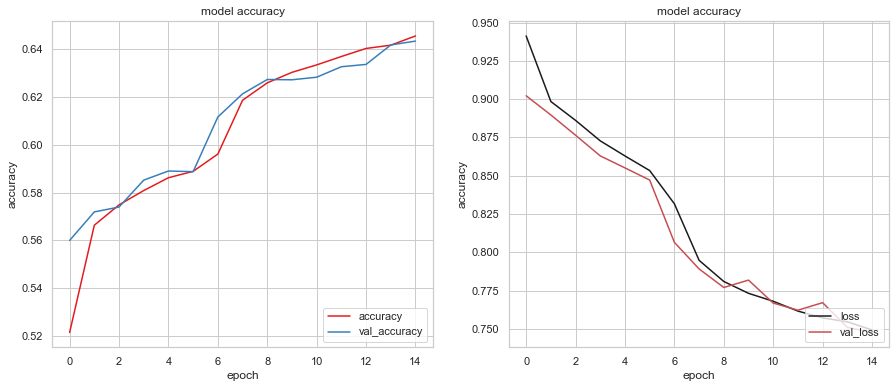

In [64]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
# plt.show()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss', color='k')
plt.plot(history.history['val_loss'], label='val_loss', color='r')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()

In [73]:
pd.DataFrame.from_dict(model_results,orient='index').sort_values(by=['f1_test','accuracy_test'],ascending=False)

accuracy_train  accuracy_test  f1_train   f1_test
Random Forest           0.985151       0.821365     0.985150  0.821043
LightGBMClassifier      0.840424       0.807560     0.840859  0.807891
XGBClassifier           0.815849       0.805297     0.816330  0.805782
CatBoostClassifier      0.810097       0.802839     0.810418  0.803193
KNN                     0.838294       0.769287     0.834605  0.762844
Decision Tree           0.961300       0.759132     0.961244  0.758514
GradientBoost           0.747398       0.747606     0.748274  0.748410
AdaBoost                0.722380       0.722177     0.722925  0.722686
Logistic Regression     0.565254       0.563447     0.555886  0.553939
LSTM                    0.645378       0.644041          NaN       NaN

## Task 1

Prepare a complete data analysis report on the given data.

* The exploratory analysis is performed and the insights are given above.

## Task 2

Create a predictive model in such a way that the objective is to predict the ordinal variable “damage_grade”. This column presents the level of damage grade affected by the earthquake.

* In this multiclass classification problem, the `CatBoostClassifier` appears to be the best model. It is generalising the models well.   
* XGBClassifier is also showing similar performance of that of CatBoostClassifier.
* Both RandomForest and LightGBM are overfitting.
* Logistic Regression is the least performing model with accuracy of 56.3447% 

## Task 3

Suggestions to the Seismologists to avoid  earthquake event leading  to significant damage in many buildings

*  
*